# Исследование объявлений о продаже квартир

Есть данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройть файл с данными и изучить общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('real_estate_data.csv', sep='\t')

Посмотрим первые и последние строки датасета

In [2]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
display(data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Основная информация о датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Гистограммы по столбцам датасета

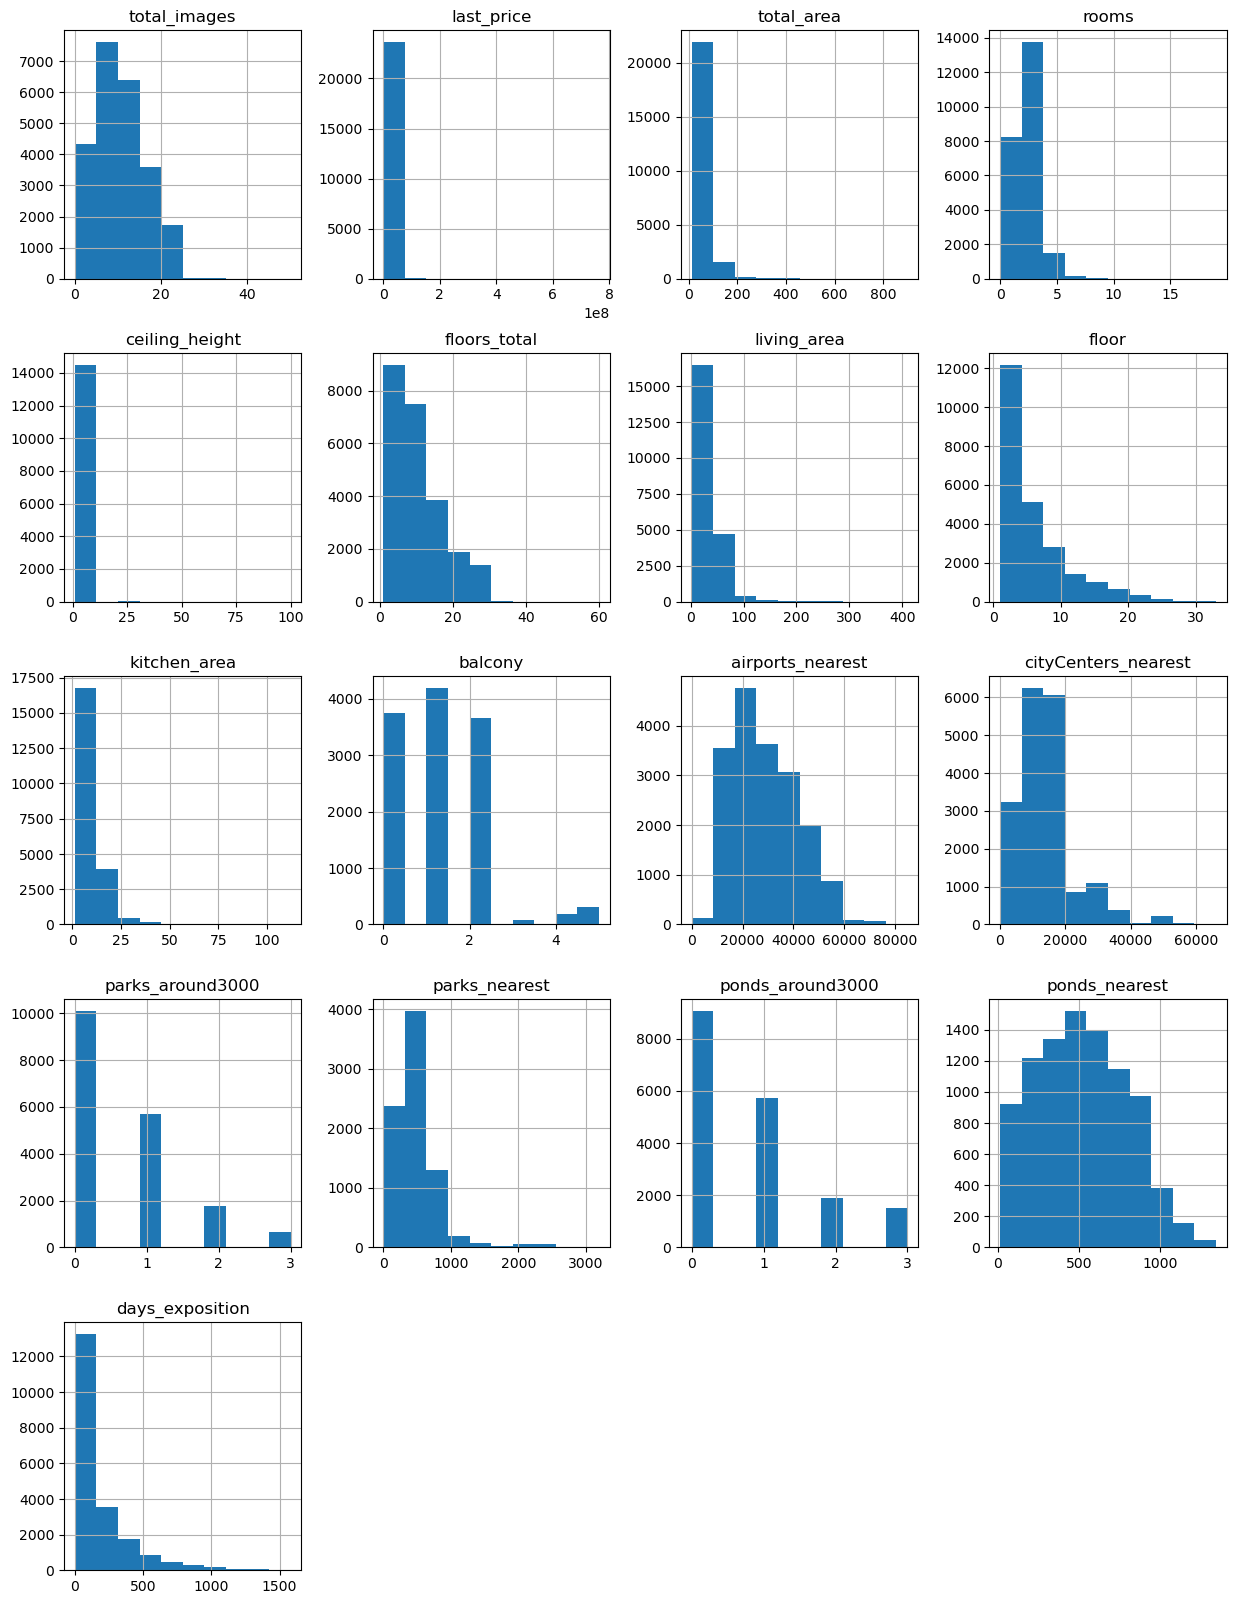

In [5]:
data.hist(figsize=(15, 20))
plt.show()

Основные метрики в целочисленных значениях

In [6]:
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


Информация о пропусках в таблице

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


#### Вывод
Для некоторых столбцов в датасете нужно изменить тип данных и привести названия к "змеиному" регистру.

В таблице есть подозрительные значения в столбцах:  
- последняя цена;  
- общая площадь;  
- комнаты;  
- высота потолков;  
- жилая площадь;  
- расстояние до ближайшего аэропорта;  
- расстояние до центра города.  

В таблице есть слишком много пропусков, которые нельзя просто так удалить.


### Предобработка данных

Функция для показа информации о столбце.

In [9]:
def column_information(col):
    print(data[col].describe())
    data.hist(col, bins=100, figsize=(15, 5))
    plt.show()

#### Столбец total_images
К столбцу total_images вопросов нет, пропуски отсутствуют.  

#### Столбец last_price.  
Пропусков в столбце нет, но присутствуют значения, которые будут сильно искажать результат. Изменим  тип данных.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


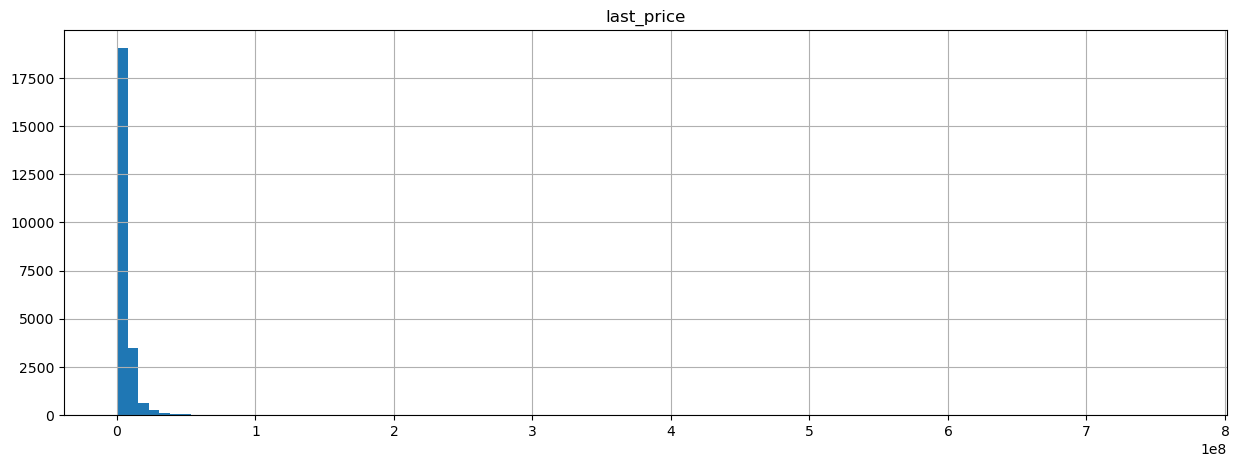

In [10]:
data['last_price'] = data['last_price'].astype('int')
column_information('last_price')

Исходя из метрик минимальное и максимальные значения подозрительны.

Построение более детальные гистограммы.

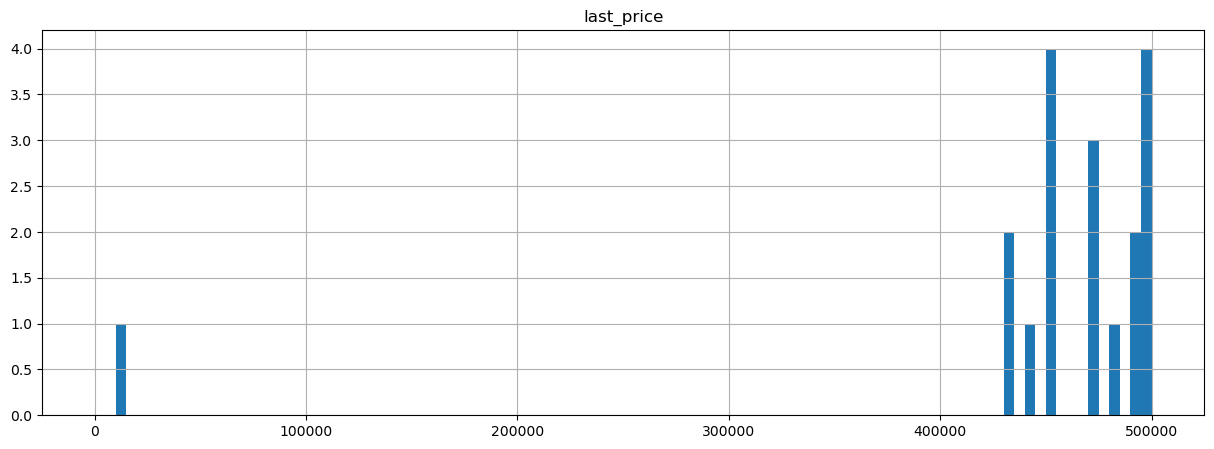

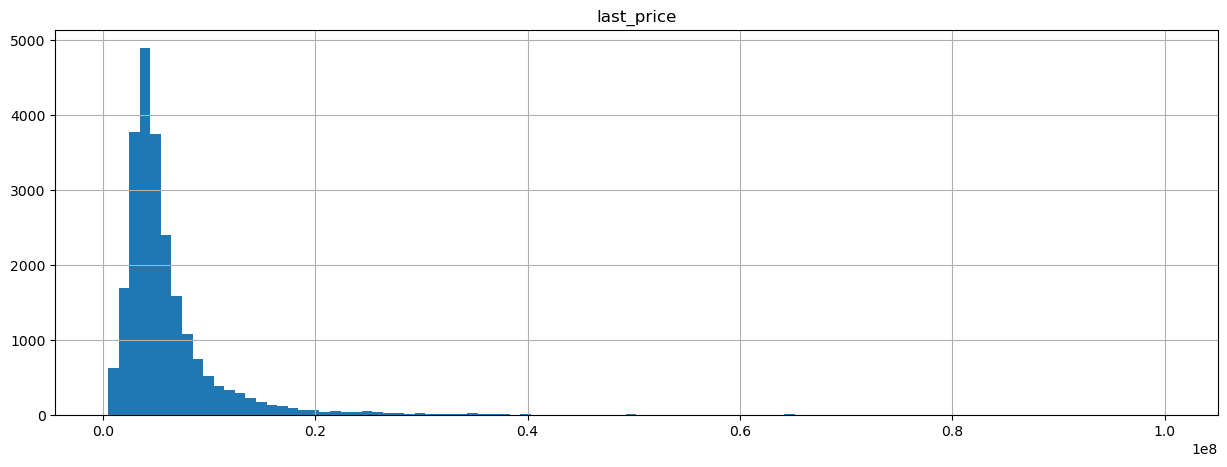

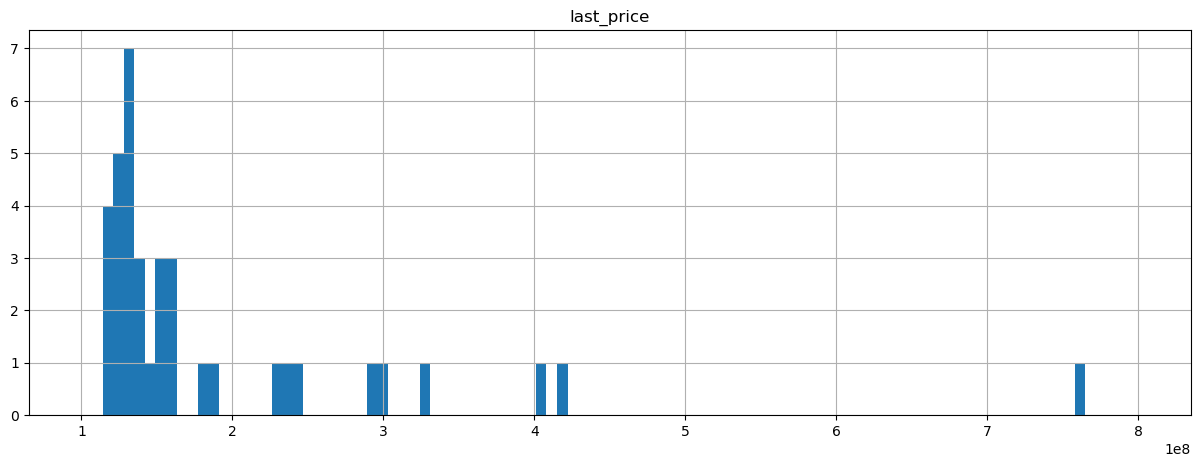

In [11]:
data.hist('last_price', bins=100, range=(0, 500000), figsize=(15, 5))
plt.show()
data.hist('last_price', bins=100, range=(500001, 100000000), figsize=(15, 5))
plt.show()
data.hist('last_price', bins=100, range=(100000001, 800000000), figsize=(15, 5))
plt.show()

Минимальную границу установим в 400000, максимальную - 400000000

In [12]:
data = data.query('400000 <= last_price <= 400000000')
data['last_price'].describe().astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23695 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23695 non-null  int64  
 1   last_price            23695 non-null  int32  
 2   total_area            23695 non-null  float64
 3   first_day_exposition  23695 non-null  object 
 4   rooms                 23695 non-null  int64  
 5   ceiling_height        14502 non-null  float64
 6   floors_total          23609 non-null  float64
 7   living_area           21792 non-null  float64
 8   floor                 23695 non-null  int64  
 9   is_apartment          2774 non-null   object 
 10  studio                23695 non-null  bool   
 11  open_plan             23695 non-null  bool   
 12  kitchen_area          21418 non-null  float64
 13  balcony               12178 non-null  float64
 14  locality_name         23646 non-null  object 
 15  airports_nearest   

#### Столбец total_area.  
В столбце total_area пропуски отсутствуют. Изменим тип данных. Изучим данные детально. 

count    23695.000000
mean        60.054273
std         35.108542
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        631.000000
Name: total_area, dtype: float64


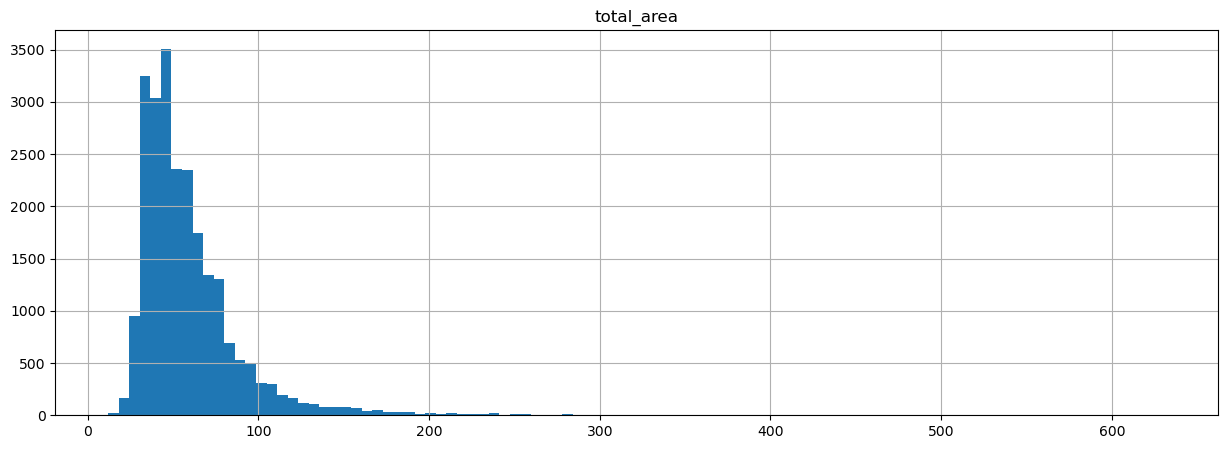

In [13]:
data['total_area'] = data['total_area'].astype('int')
column_information('total_area')

Среднее значение 60 кв. м, минимальное и максимальное значения 12 кв. м и 631 кв. м соответственно. Квартиры с такой площадью существуют, так что все оставим без изменений.

#### Столбец first_day_exposition.  
В этом столбце нужно изменить тип данных на datetime и уберем время, так как оно не указано.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### Столбец rooms.  
Изучим данные подробнее.

count    23695.000000
mean         2.069888
std          1.075920
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


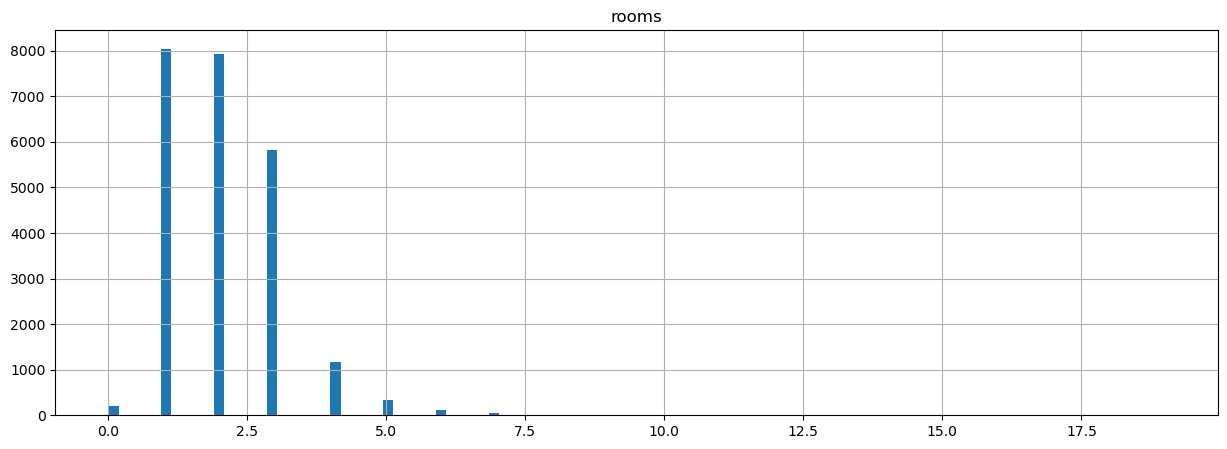

1     8047
2     7939
3     5814
4     1180
5      325
0      197
6      105
7       58
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

In [15]:
column_information('rooms')
data['rooms'].value_counts()

Есть 59 квартиры с 0 комнат. Рассмотрим срез с данным условием.

In [16]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25,2017-09-27,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34,2017-03-28,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26,2017-09-01,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000,27,2017-09-28,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000,26,2018-09-07,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000,29,2017-11-11,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Судя по общей площади это могут быть 1-комнатные мало- или микрогабаритные квартиры, так что заменим 0 на 1, за исключением квартиры с площадью 371 кв. м. Эту строку просто удалим.

In [17]:
data.loc[(data['rooms'] == 0) & (data['total_area'] < 43), 'rooms'] = 1
data = data.query('rooms != 0')
display(data['rooms'].value_counts())
data.info()

1     8237
2     7939
3     5814
4     1180
5      325
6      105
7       58
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23688 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23688 non-null  int64         
 1   last_price            23688 non-null  int32         
 2   total_area            23688 non-null  int32         
 3   first_day_exposition  23688 non-null  datetime64[ns]
 4   rooms                 23688 non-null  int64         
 5   ceiling_height        14496 non-null  float64       
 6   floors_total          23602 non-null  float64       
 7   living_area           21786 non-null  float64       
 8   floor                 23688 non-null  int64         
 9   is_apartment          2774 non-null   object        
 10  studio                23688 non-null  bool          
 11  open_plan             23688 non-null  bool          
 12  kitchen_area          21418 non-null  float64       
 13  balcony         

Столбец ceiling_height.  
В столбце есть пропущенные значения. Нужно рассмотреть данные подробнее.

count    23618.000000
mean         2.693613
std          0.204044
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64


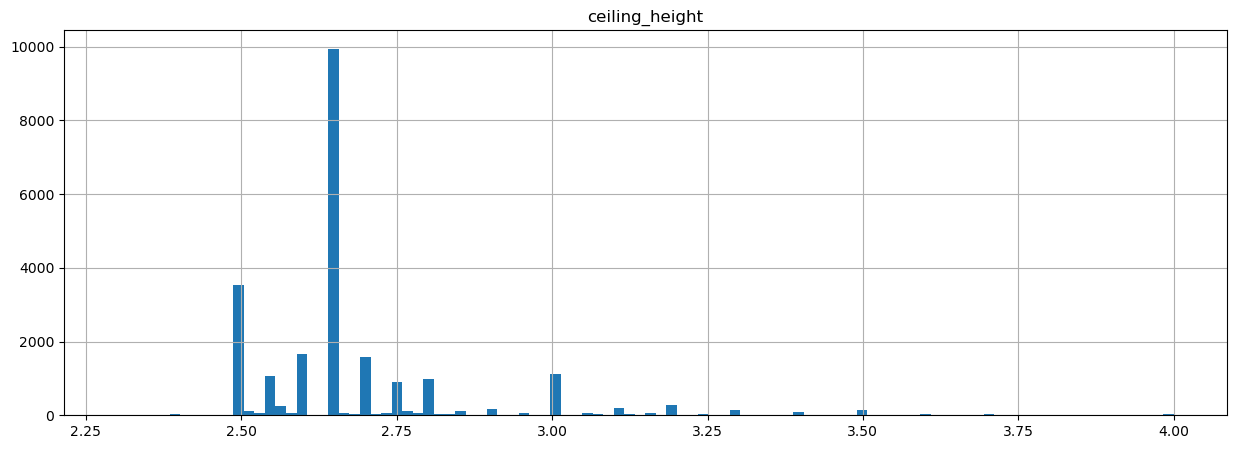

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 2.45,
       3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 2.4 ,
       3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82,
       3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85,
       3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81,
       3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33, 3.63,
       3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.84, 3.23, 3.02, 3.21, 3.43,
       3.78, 3.39, 2.69, 3.31, 3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 2.91,
       3.88, 3.29, 3.76, 3.69, 2.89, 3.58, 2.49, 3.48, 3.59])

In [23]:
column_information('ceiling_height')
data['ceiling_height'].unique()

В массовых застройках минимальная высота 2,5 м. За нижнюю границу примем высоту равную 2,3 м. За верхнюю - 4 м. Есть значения наподобии 25 или 32, вероятно, это обычные квартиры и просто ошиблись в воде данных, так что разделим эти значения на 10.

In [19]:
data.loc[(data['ceiling_height'] > 22) & (data['ceiling_height'] < 41), 'ceiling_height'] = data.loc[(data['ceiling_height'] > 22) & (data['ceiling_height'] < 41), 'ceiling_height'] / 10
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

Удаление строк где высота меньше 2,3 м и больше 4 м.

In [20]:
drop_height = data.query('ceiling_height < 2.3 or 4 < ceiling_height')['ceiling_height']
#переменная со значениями которые необходимо удалить
data = data.query('ceiling_height not in @drop_height')

Заполние пропусков медианой.

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23618 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23618 non-null  int64         
 1   last_price            23618 non-null  int32         
 2   total_area            23618 non-null  int32         
 3   first_day_exposition  23618 non-null  datetime64[ns]
 4   rooms                 23618 non-null  int64         
 5   ceiling_height        23618 non-null  float64       
 6   floors_total          23532 non-null  float64       
 7   living_area           21724 non-null  float64       
 8   floor                 23618 non-null  int64         
 9   is_apartment          2762 non-null   object        
 10  studio                23618 non-null  bool          
 11  open_plan             23618 non-null  bool          
 12  kitchen_area          21358 non-null  float64       
 13  balcony         

#### Столбец floors_total.

count    23532.000000
mean        10.683962
std          6.596368
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


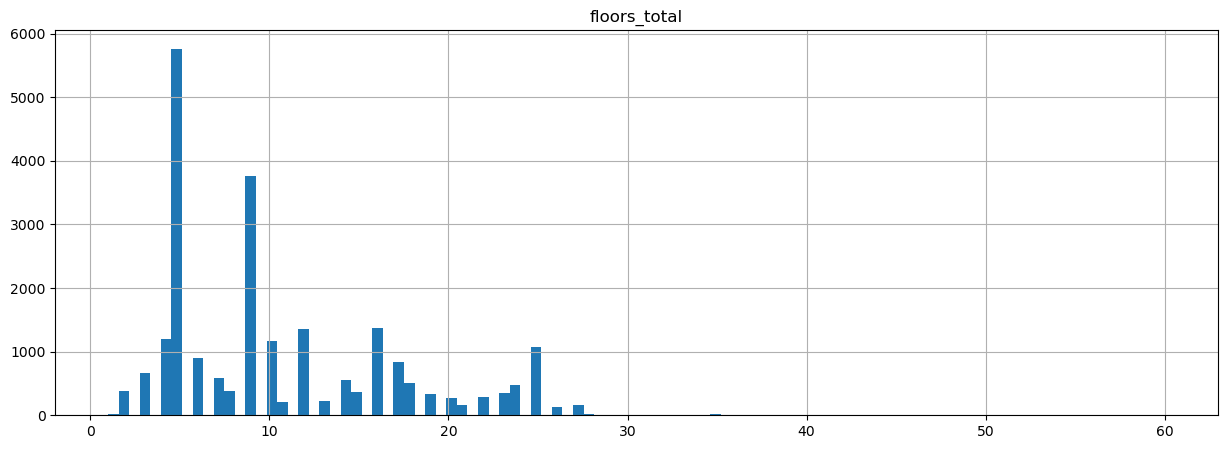

In [24]:
column_information('floors_total')

Данные выглядят корректно. Пропусков мало, так что можно заполнить медианой и изменить тип столбца на int

In [25]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()).astype('int')

print('Количество пропусков:', data['floors_total'].isna().sum())

Количество пропусков: 0


#### Столбец living area. 
Посмотрим данные.

count    21724.000000
mean        34.318659
std         21.420985
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64


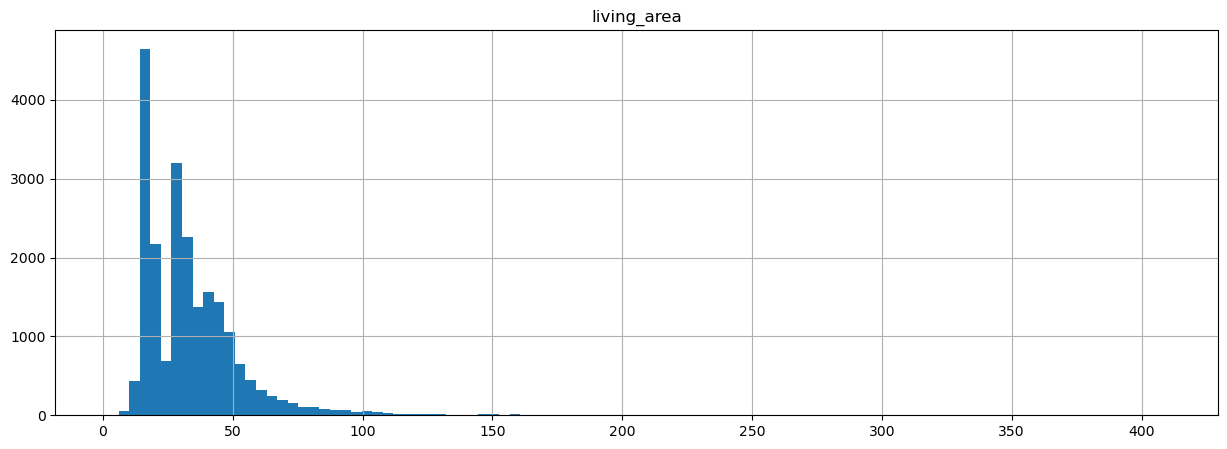

In [26]:
column_information('living_area')

Минимальное значение в столбце 2 кв. м. Подозрительно. Жилая полощадь не может быть меньше 6 кв. м (минимальная санитарная норма). И само собой не может быть больше общей площади. Разыщем такие значения.

In [27]:
drop_area = data.query('living_area > total_area or 0 < living_area < 6')['living_area']
display(drop_area)


3242      3.0
12691    24.2
13915     2.0
17582     5.0
21758     2.0
21943     5.4
23574     3.0
Name: living_area, dtype: float64

In [28]:
data = data.query('living_area not in @drop_area')
display(data['living_area'].describe())

count    21706.000000
mean        34.332800
std         21.422361
min          6.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64

Пропуски заполним медианой.

In [29]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int32         
 2   total_area            23600 non-null  int32         
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int32         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Столбец floor.  
Рассмотри данные по столбцу.

count    23600.000000
mean         5.891907
std          4.883460
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


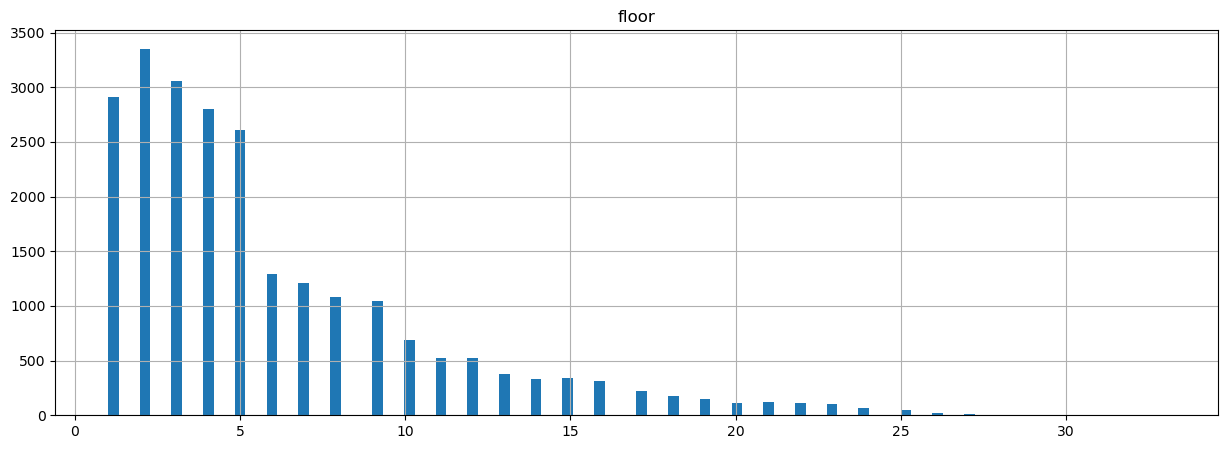

In [30]:
column_information('floor')

Данные корректны. Двигаемся дальше.

#### Столбец is_apartment.  
Нужно изменить тип данных на булевый. В столбце наибольшее количество пропусков. Вероятнее всего параметр апартаменты появился после запуска сервиса. Лучше всего будет заполнить пропуски значением False.

In [31]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data.loc[data['is_apartment'] != True, 'is_apartment'] = False
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int32         
 2   total_area            23600 non-null  int32         
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int32         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Столбец studio.  
К столбцу вопросов нет.

#### Столбец open_plan.  
К столбцу вопросов нет.

#### Столбец kitchen_area.  
Рассмотрим данные

count    21343.000000
mean        10.546634
std          5.828170
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


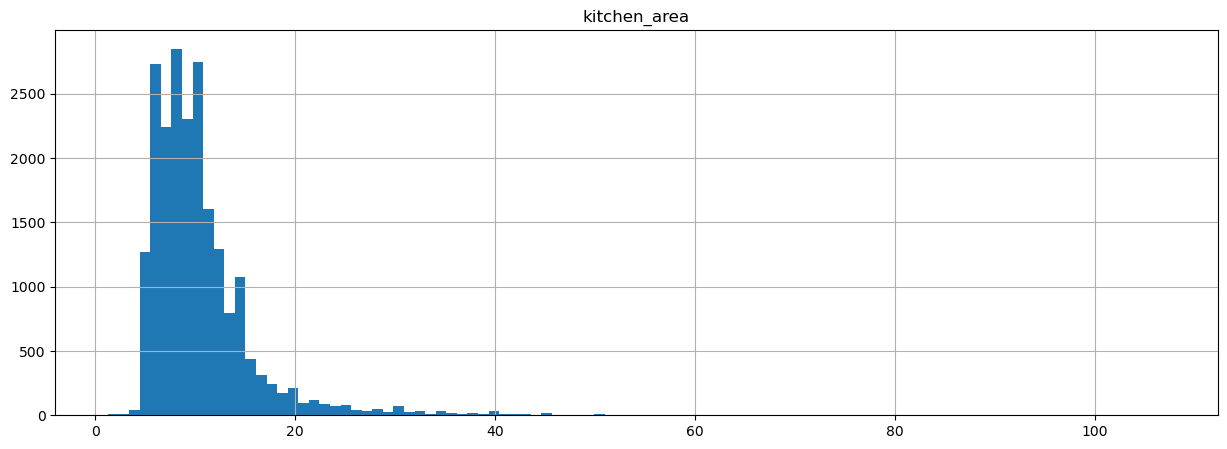

In [32]:
column_information('kitchen_area')

Есть пропуски и аномально малаенькие значения. Площадь кухни должна быть не менее 5 кв. м. Заполним пропуски и значения меньше 5 кв. м на 0, а потом заменим их на медиану.

In [33]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
kitchen_area_0 = data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = 0
data.loc[data['kitchen_area'] == 0, 'kitchen_area'] = data['kitchen_area'].median()
data['kitchen_area'].describe()

count    23600.000000
mean        10.420581
std          5.545403
min          5.000000
25%          7.462500
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

#### Столбец balcony.   
Рассмотрим столбец.

count    12134.000000
mean         1.149827
std          1.071099
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


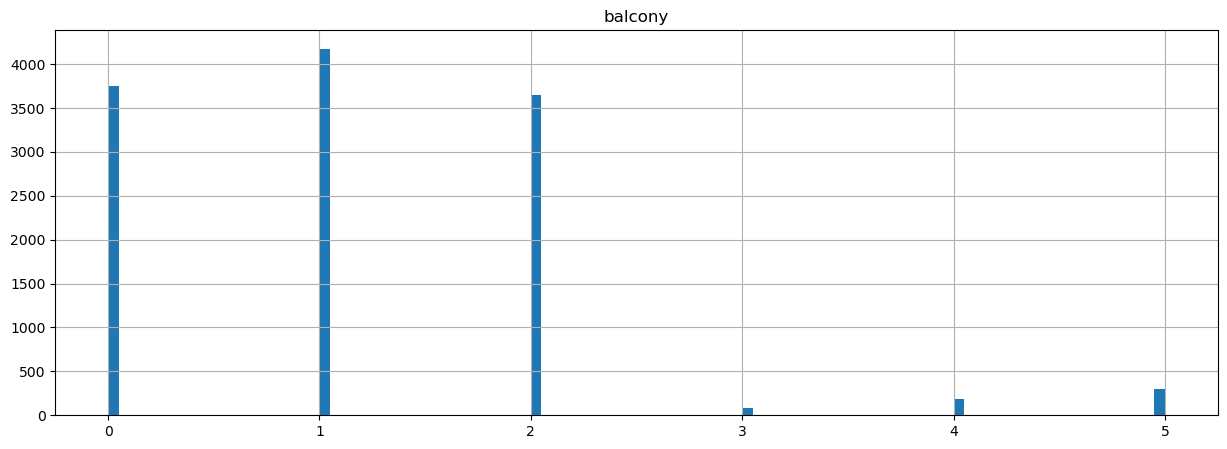

In [34]:
column_information('balcony')

Есть пропуски, значит, вероятно, в таких квартирах балкона нет. Заполним пропуски 0 и изменим тип данных.

In [35]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int32         
 2   total_area            23600 non-null  int32         
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int32         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          23600 non-null  float64       
 13  balcony         

#### Столбец locality_name.  
Рассмотрим уникальные значения.

In [36]:
display(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Приведем названия к нижнему регистру, заменим: "ё" на "е", "городской поселок" и "поселок городского типа" на пгт, "поселок при железнодорожной станции" на "поселок станции", "село Никольское"  на "Никольское".

In [37]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','пгт')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','пгт')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок станции')
data['locality_name'] = data['locality_name'].str.replace('село Никольское','Никольское')
display(data['locality_name'].sort_values().unique())

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

In [38]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


In [39]:
('Количество пропусков:', data['locality_name'].isna().sum())

('Количество пропусков:', 49)

Пропуски оставим как есть.

#### Столбец airports_nearest.  
Рассмотрим данные.

count    18080.000000
mean     28801.979923
std      12644.559442
min          0.000000
25%      18571.000000
50%      26757.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64


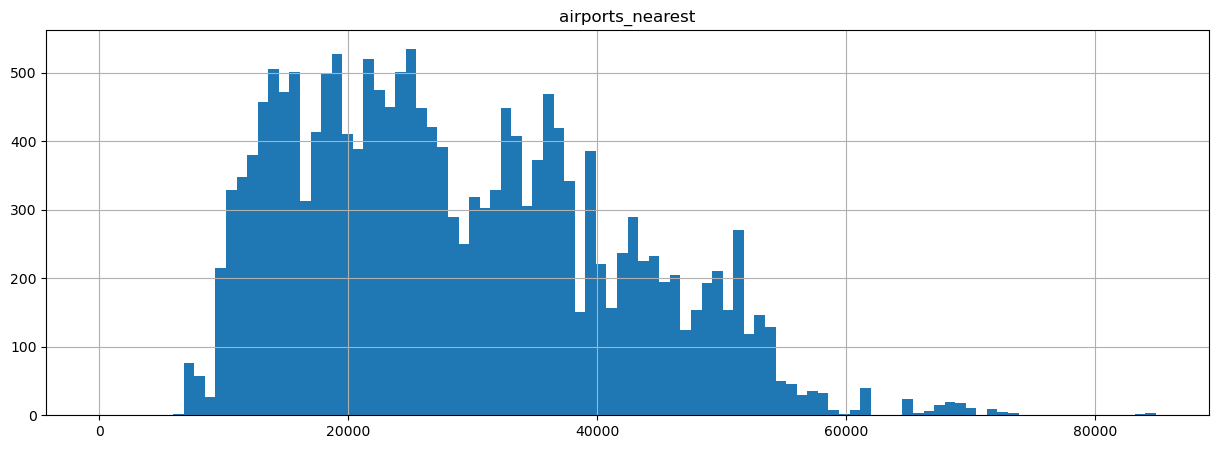

In [40]:
column_information('airports_nearest')

Присутствует значение 0. Возможно ошибка из-за человеческого фактора. Заполним это значение медианой по городу а пропуски оставим как есть.

In [41]:
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34,2018-09-23,1,2.7,9,19.8,3,True,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [42]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = data.loc[(data['locality_name'] == 'санкт-петербург'), 'airports_nearest'].median()
display(data.loc[21085])

total_images                              0
last_price                          7000000
total_area                               34
first_day_exposition    2018-09-23 00:00:00
rooms                                     1
ceiling_height                          2.7
floors_total                              9
living_area                            19.8
floor                                     3
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                            6.0
balcony                                   2
locality_name               санкт-петербург
airports_nearest                    26781.0
cityCenters_nearest                 22801.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                        60.0
Name: 21085, dtype: object

#### Столбец cityCenters_nearest.  
Название стобца приведем к змеиному регистру.

In [43]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)
data.info()
data['city_centers_nearest'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int32         
 2   total_area            23600 non-null  int32         
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int32         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          23600 non-null  float64       
 13  balcony         

count    18100.000000
mean     14216.272818
std       8606.874853
min        181.000000
25%       9277.000000
50%      13114.000000
75%      16298.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

#### Столбец parks_around3000.
Приведем столбец к змеиному регистру, изменим тип данных и посмотрим информацию.

count    18101.000000
mean         0.610187
std          0.801293
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64


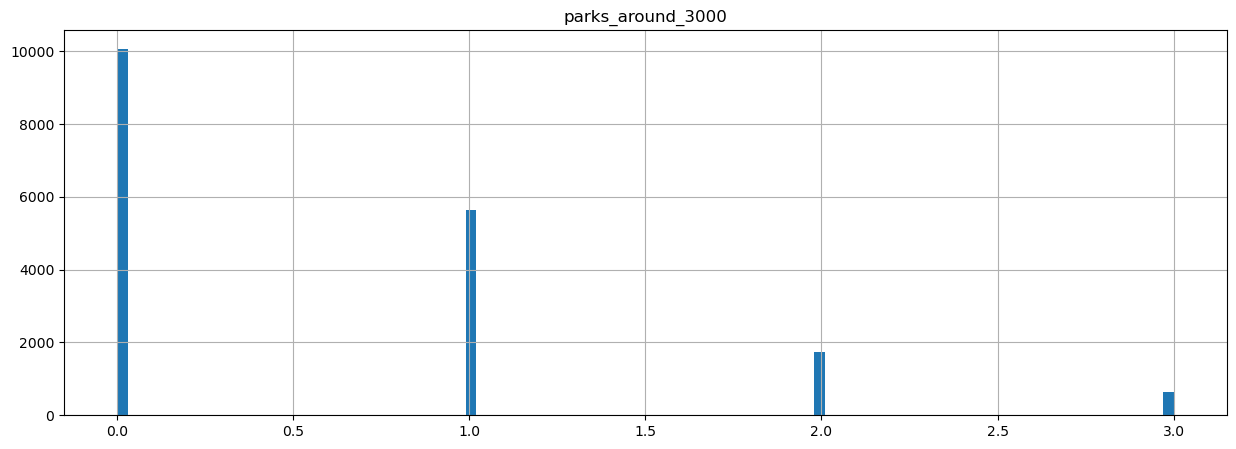

Количество пропусков: 5499


In [44]:
data.rename(columns = {'parks_around3000':'parks_around_3000'}, inplace=True)
column_information('parks_around_3000')
print('Количество пропусков:', data['parks_around_3000'].isna().sum())

Заполним пропуски 0, т. к., вероятнее всего, парки остутствуют в заданном радиусе.

In [45]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int32         
 2   total_area            23600 non-null  int32         
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int32         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          23600 non-null  float64       
 13  balcony         

#### Столбец parks_nearest.  
Рассмотрим информацию о столбце.

count    8032.000000
mean      490.543327
std       342.100678
min         1.000000
25%       288.000000
50%       453.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


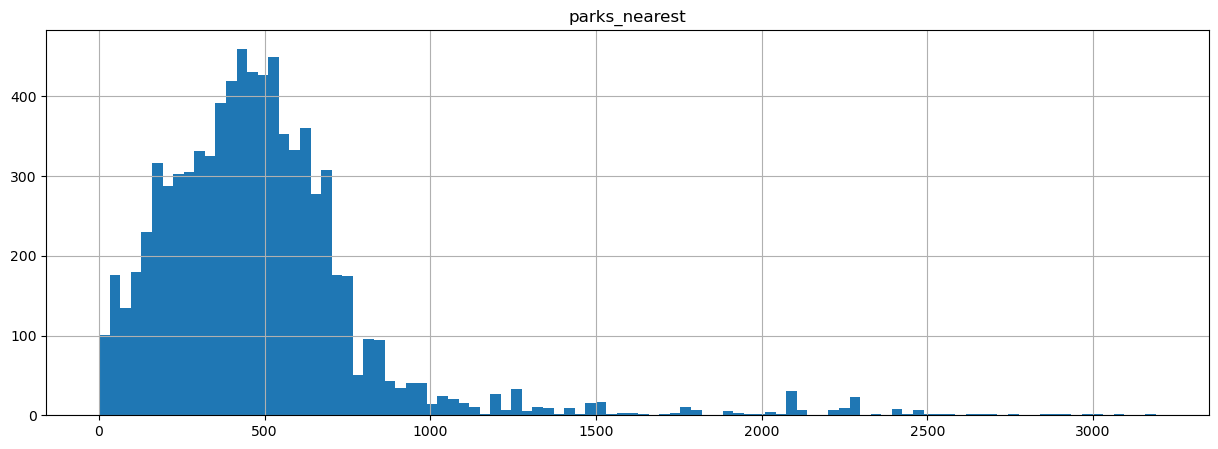

Количество пропусков: 15568


In [46]:
column_information('parks_nearest')
print('Количество пропусков:', data['parks_nearest'].isna().sum())

In [47]:
print('Количсетво 0 значений в столбце parks_aound_3000:', data.loc[data['parks_around_3000'] == 0, 'parks_around_3000'].count())

Количсетво 0 значений в столбце parks_aound_3000: 15572


Количество пропусков в данном столбце почти совпадает с количеством пропусков в предыдущем, соответственно парк либо отсутствует в пределах радиуса, либо находится за пределами оговоренной границы. В данном случае считаю, что пропуски нужно оставить как есть.

#### Столбец ponds_around_3000.  
Со столбцом поступим аналогичным образом как с количеством парков.

count    18101.000000
mean         0.768190
std          0.937002
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64


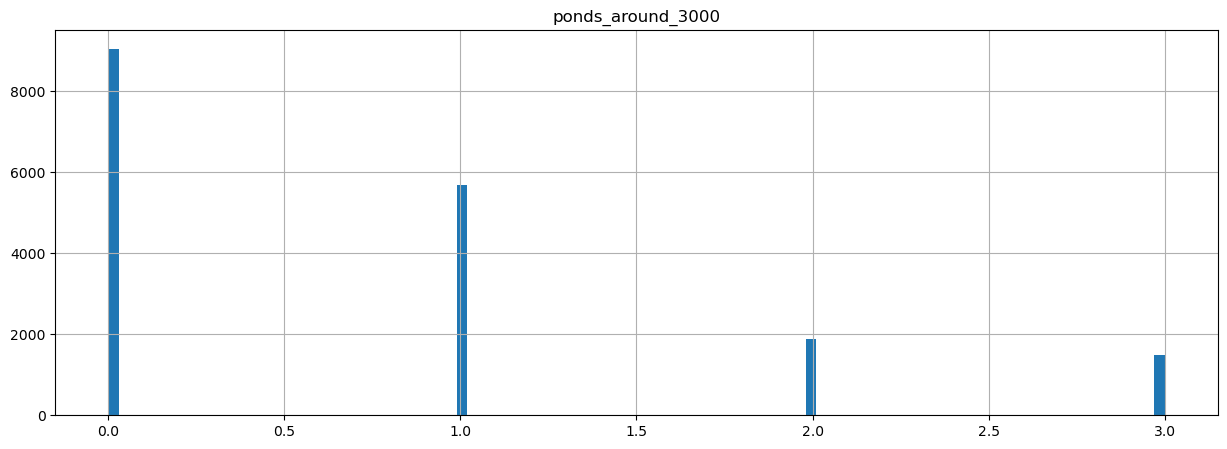

Количество пропусков: 5499


In [48]:
data.rename(columns = {'ponds_around3000':'ponds_around_3000'}, inplace=True)
column_information('ponds_around_3000')
print('Количество пропусков:', data['ponds_around_3000'].isna().sum())

Заполним пропуски 0, т. к., вероятнее всего, пруды остутствуют в заданном радиусе.

In [49]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int32         
 2   total_area            23600 non-null  int32         
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int32         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          23600 non-null  float64       
 13  balcony         

#### Столбец ponds_nearest.  
Аналогично с парками пропуски оставим как есть.

#### Столбец days_exposition.  
Рассмотрим данные. Изменим тип данных.

count    20433.000000
mean       180.693143
std        219.482467
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


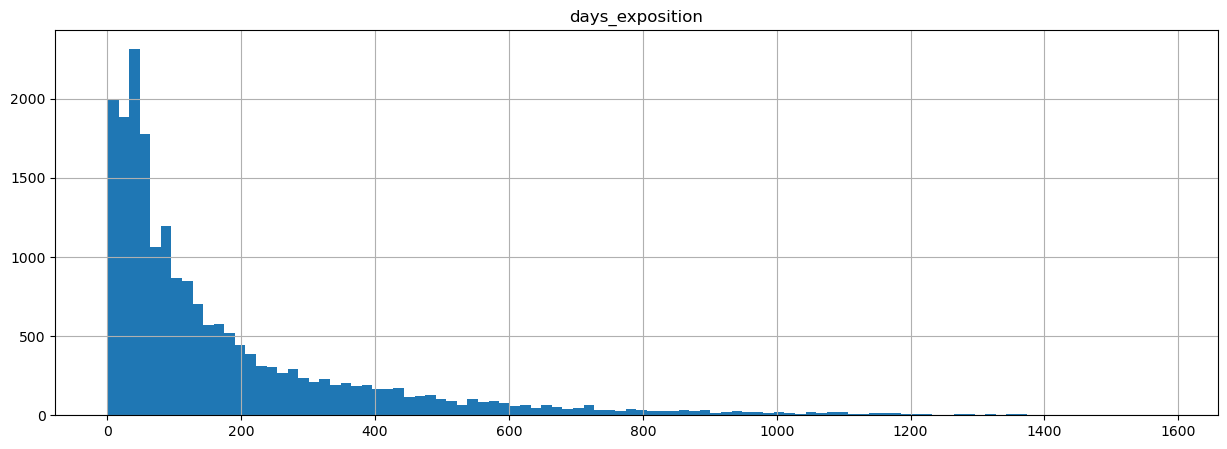

Количество пропусков: 3167
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int32         
 2   total_area            23600 non-null  int32         
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int32         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          23600 non-null  float64  

In [50]:
column_information('days_exposition')
print('Количество пропусков:', data['days_exposition'].isna().sum())
data.info()

Исходя из данных можно сделать вывод, что в объявления, где не указано количество дней показа, еще активны, поэотму пропуски оставим без изменений.

#### Вывод  
В датасете было много ошибок: неверные типы данных столбцов, пропуски значений, стилистически неверные названия столбцов. В итоге, были исключены аномальные выбросы, исправлены типы данных на корректные, исправлены названия столбцов, заполнены пропуски данных. Удалено было всего 0,4 % данных. Хороший результат.

### Посчитать и добавитьв таблицу новые столбцы

#### Цена одного квадратного метра.  

In [51]:
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000,40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750
2,10,5196000,56,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000,159,2015-07-24,3,2.65,14,30.00,9,True,False,False,9.00,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000
5,10,2890000,30,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,пгт янино-1,NaN,NaN,0,NaN,0,NaN,55.0,96333
6,6,3700000,37,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,100000
7,5,7915000,71,2019-04-18,2,2.65,24,30.00,22,True,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,111478
8,20,2900000,33,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189.0,87878
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524


#### День / месяц / год публикации.

In [52]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14,30.00,9,True,False,False,9.00,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018
5,10,2890000,30,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,пгт янино-1,NaN,NaN,0,NaN,0,NaN,55.0,96333,0,9,2018
6,6,3700000,37,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,100000,3,11,2017
7,5,7915000,71,2019-04-18,2,2.65,24,30.00,22,True,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,111478,3,4,2019
8,20,2900000,33,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189.0,87878,2,5,2018
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,6,2,2017


#### Тип этажа.

In [54]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750,1,12,2018,первый
2,10,5196000,56,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159,2015-07-24,3,2.65,14,30.00,9,True,False,False,9.00,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой
5,10,2890000,30,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,пгт янино-1,NaN,NaN,0,NaN,0,NaN,55.0,96333,0,9,2018,другой
6,6,3700000,37,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,100000,3,11,2017,другой
7,5,7915000,71,2019-04-18,2,2.65,24,30.00,22,True,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,111478,3,4,2019,другой
8,20,2900000,33,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189.0,87878,2,5,2018,другой
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,6,2,2017,другой


#### Расстояние до центра в км.

In [55]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750,1,12,2018,первый,19.0
2,10,5196000,56,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159,2015-07-24,3,2.65,14,30.00,9,True,False,False,9.00,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0
5,10,2890000,30,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,пгт янино-1,NaN,NaN,0,NaN,0,NaN,55.0,96333,0,9,2018,другой,NaN
6,6,3700000,37,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,100000,3,11,2017,другой,19.0
7,5,7915000,71,2019-04-18,2,2.65,24,30.00,22,True,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,111478,3,4,2019,другой,12.0
8,20,2900000,33,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189.0,87878,2,5,2018,другой,NaN
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,6,2,2017,другой,15.0


#### Вывод  
В этом разделе добавили новые столбцы, посчитали цену одного квадратного метра, разделили этажи, на которых расположены квартиры, по категориям и посчитали расстояние до центра в км.

### Проведение исследовательского анализа данных

#### Изучение параметры

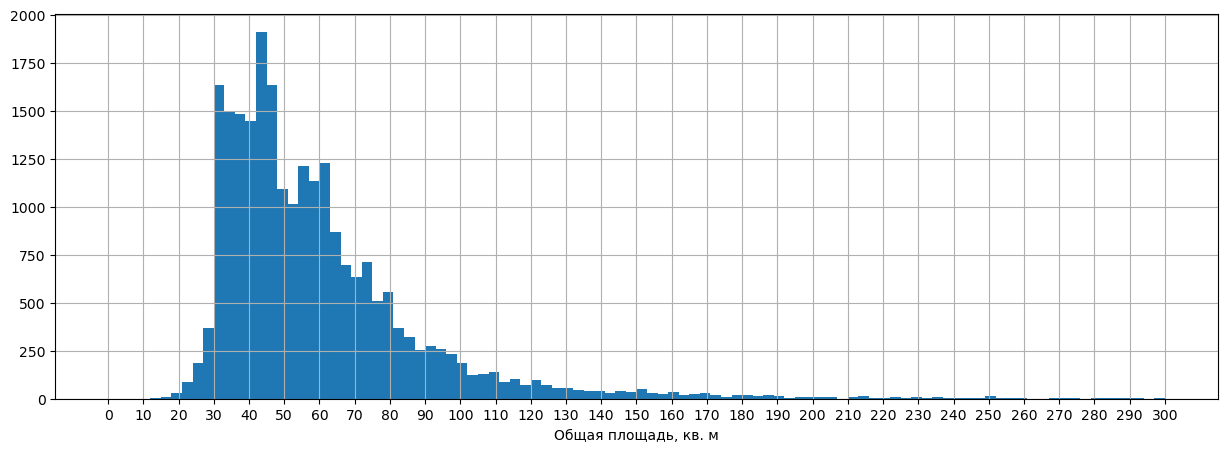

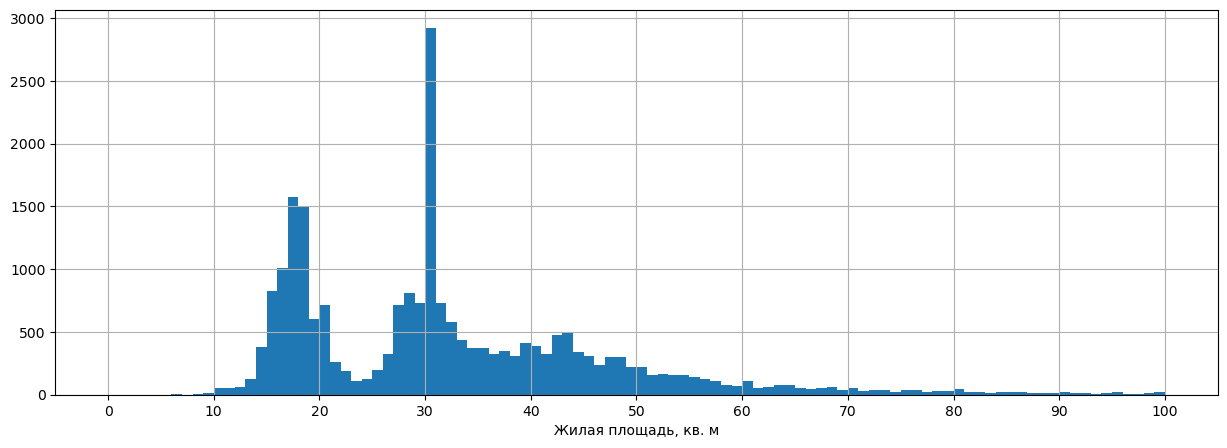

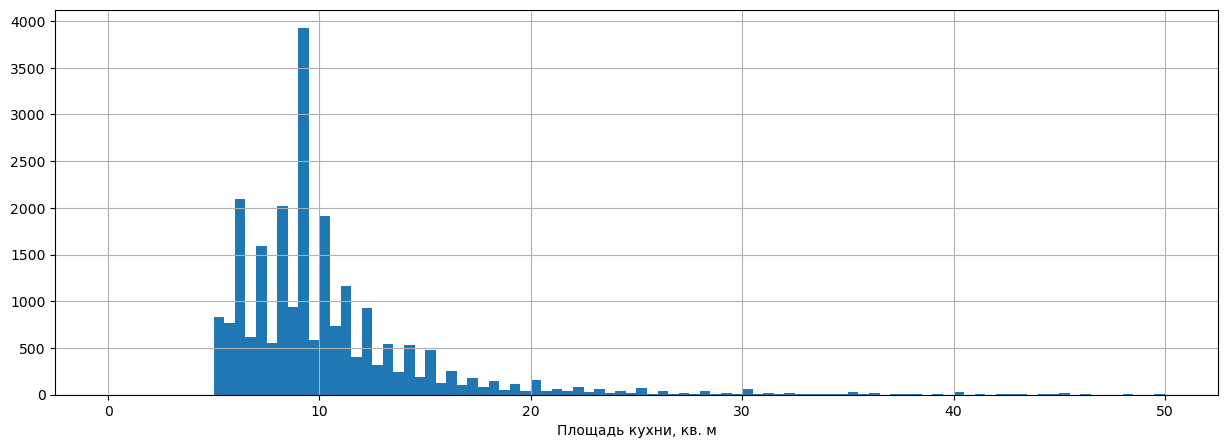

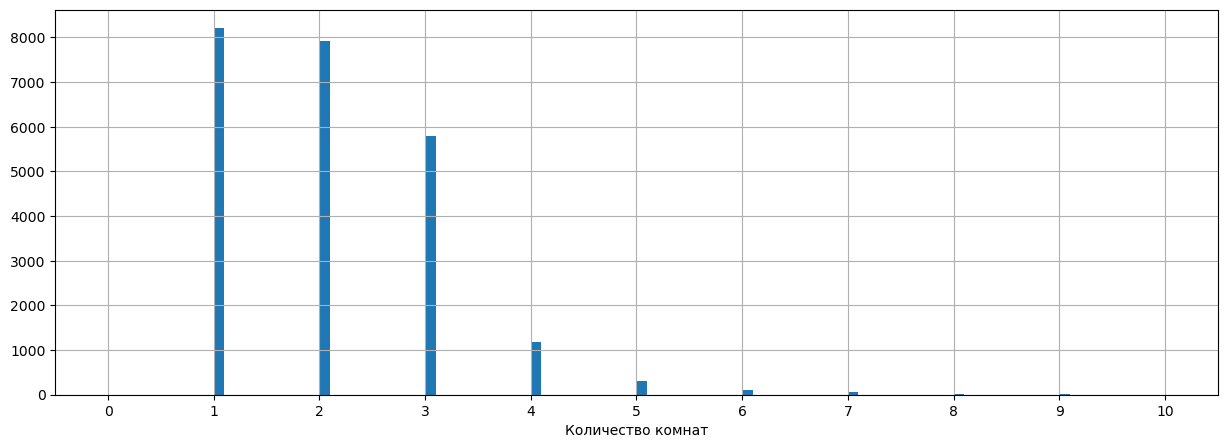

In [56]:
data['total_area'].hist(figsize=(15,5), bins=100, range=(0, 300))
plt.xlabel('Общая площадь, кв. м')
plt.xticks(np.arange(0,301,10))
plt.show()
data['living_area'].hist(figsize=(15,5), bins=100, range=(0, 100))
plt.xlabel('Жилая площадь, кв. м')
plt.xticks(np.arange(0,101,10))
plt.show()
data['kitchen_area'].hist(figsize=(15,5), bins=100, range=(0, 50))
plt.xlabel('Площадь кухни, кв. м')
plt.xticks(np.arange(0,51,10))
plt.show()
data['rooms'].hist(figsize=(15,5), bins=100, range=(0, 10))
plt.xlabel('Количество комнат')
plt.xticks(np.arange(0,11,1))
plt.show()

По графикам видно, что больше всего продают 1 и 2 комнатные квартиры с площадью от 30 до 50 квадратов, с жилой плащадью около 30 квадратов и площадью кухни в 9 квадратов.

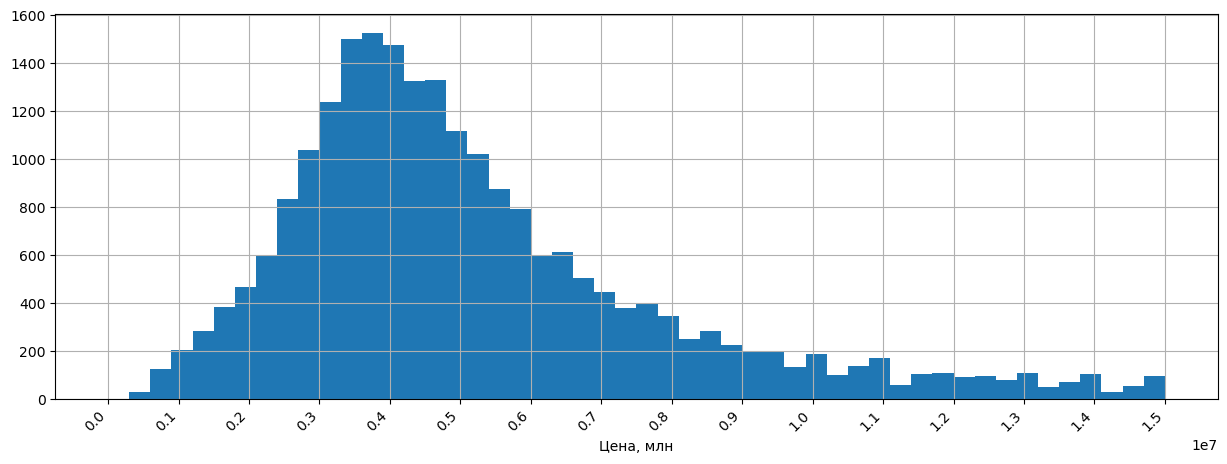

In [57]:
data['last_price'].hist(figsize=(15,5), bins=50, range=(0, 15000000))
plt.xlabel('Цена, млн')
plt.xticks(np.arange(0, 15000001, 1000000), rotation=45, ha='right')
plt.show()

Большинство квартир продается от 3 до 5 млн. Данная цена соответствует 1 и 2 комнатным квартирам.

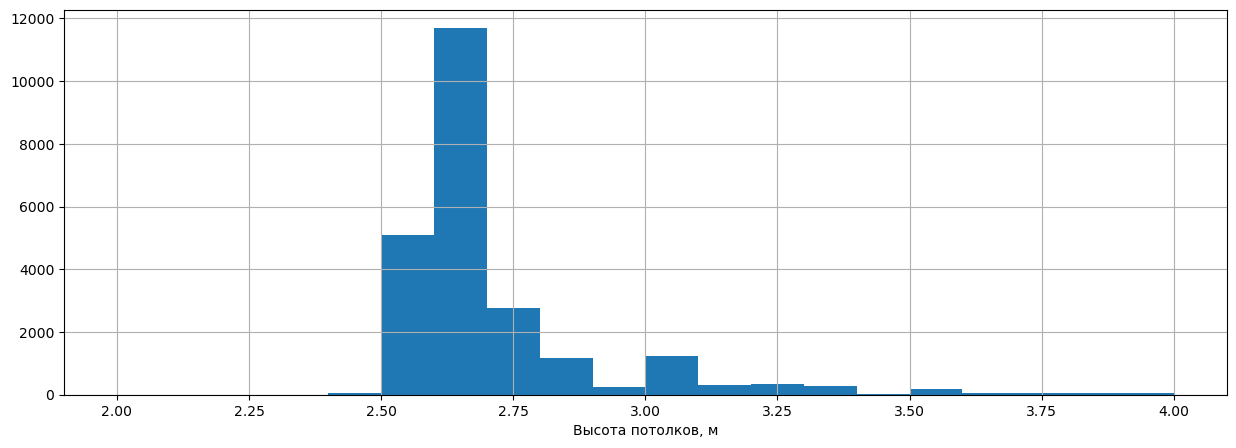

In [58]:
data['ceiling_height'].hist(figsize=(15,5), bins=20, range=(2, 4))
plt.xlabel('Высота потолков, м')
plt.show()

На рынке большинство квартир продается с высотой потолков от 2,5 до 2,7 м. Это сама распостраненная высота при застройке.

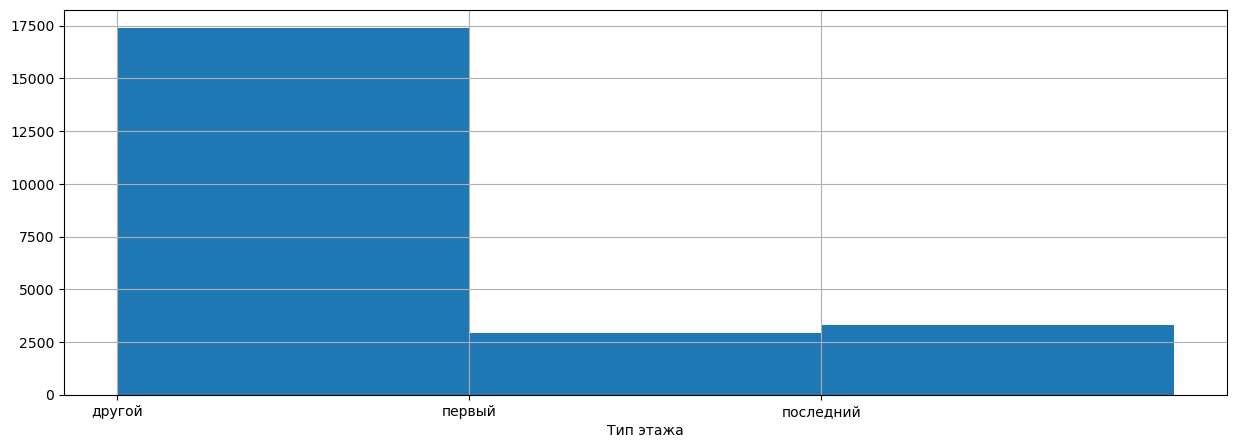

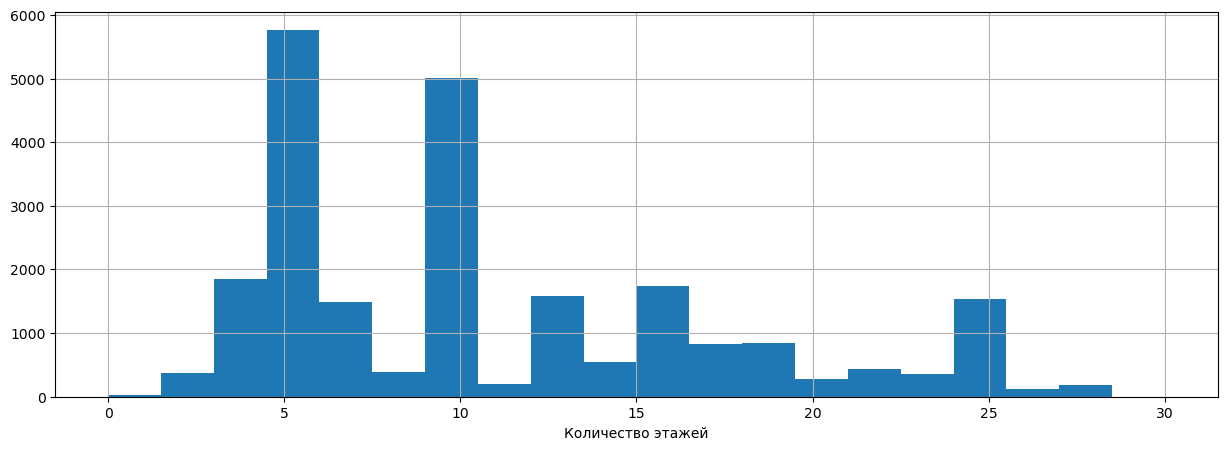

In [59]:
data['floor_type'].hist(figsize=(15,5), bins=3, range=(0, 3))
plt.xlabel('Тип этажа')
plt.show()
data['floors_total'].hist(figsize=(15,5), bins=20, range=(0, 30))
plt.xlabel('Количество этажей')
plt.xticks(np.arange(0,31,5))
plt.show()

Большинство квартир представленно не на первых и последних этажах в 5 и 9 этажных домах. Самая распостраненная застройка спальных районов в советские времена.

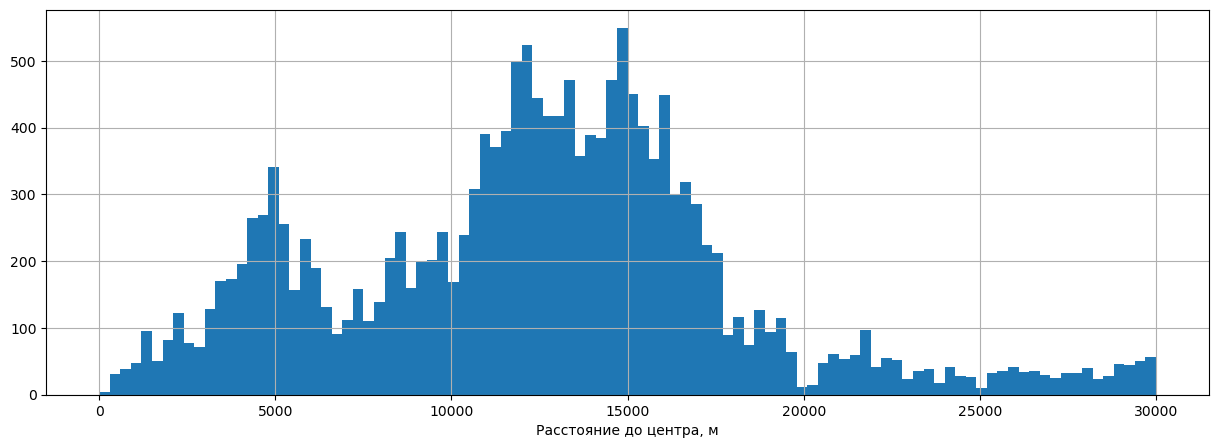

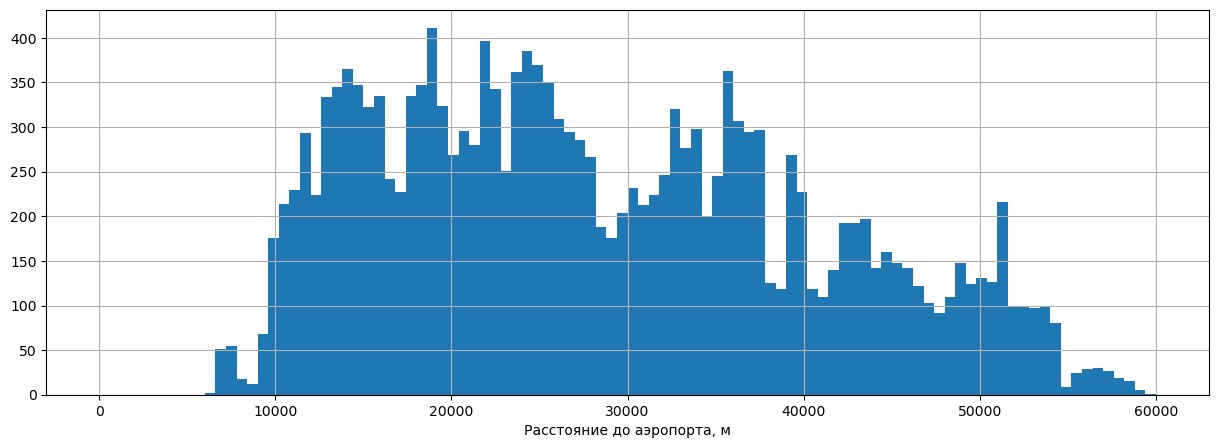

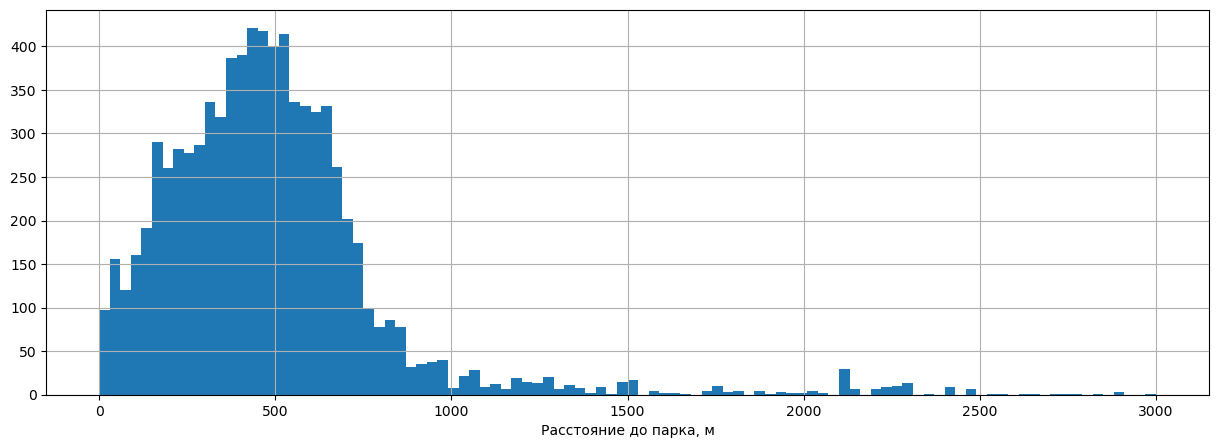

In [60]:
data['city_centers_nearest'].hist(figsize=(15,5), bins=100, range=(0, 30000))
plt.xlabel('Расстояние до центра, м')
plt.show()
data['airports_nearest'].hist(figsize=(15,5), bins=100, range=(0, 60000))
plt.xlabel('Расстояние до аэропорта, м')
plt.show()
data['parks_nearest'].hist(figsize=(15,5), bins=100, range=(0, 3000))
plt.xlabel('Расстояние до парка, м')
plt.show()


Большинство представленных квартир располагается в 10, 17 км от центра Санкт-Петербурга, что соответсвует спальным районам где массовые застройки. В близи центра предложение заметно меньше, так как в здесь цены на жилье выше. Все что свыше 25 км, в большинстве случаев это квартиры расположенные в городах и селах за пределами границы Санкт-Петербурга.   
От центра Петербурга до Пулково около 22 км. Соответственно большинство квартир представленно на расстоянии от 10 до 37 км, учитывая разные части города и плюс квартиры расположенные за чертой города, но непосредственно вблизи аэропорта.  
В петербурге 68 парков. Ландшафт города предусматривает наличие лесо-парковых зон, поэтому не удивительно, что много квартир располагается вблизи парков.

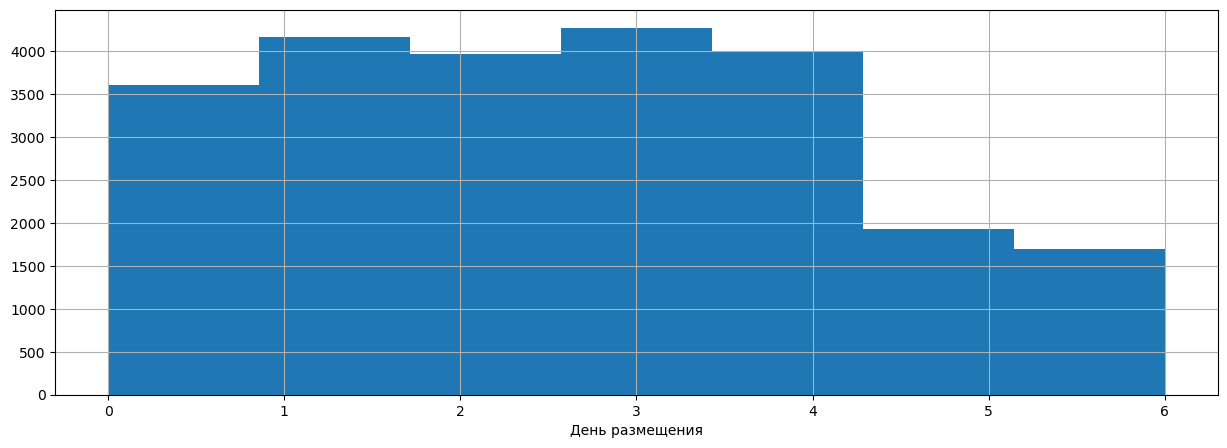

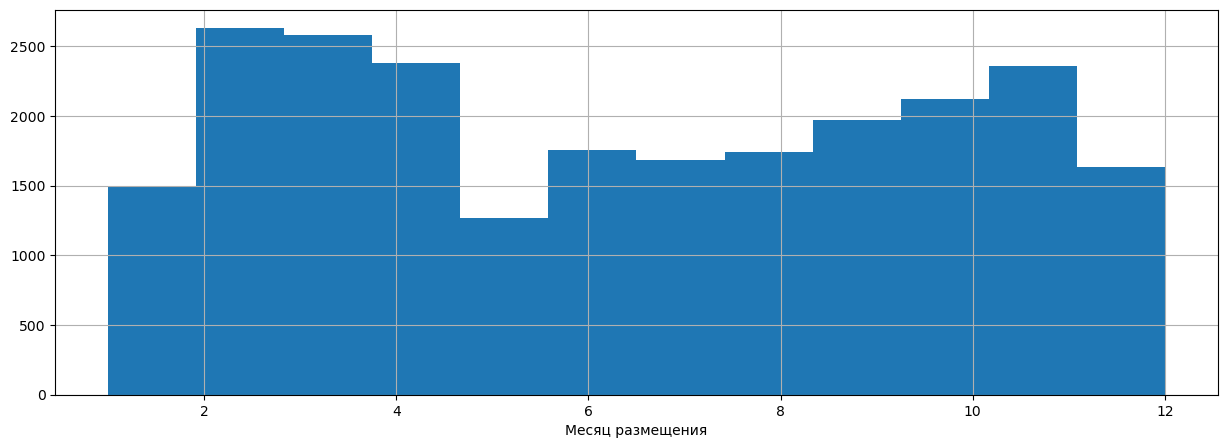

In [61]:
data['weekday'].hist(figsize=(15,5), bins=7)
plt.xlabel('День размещения')
plt.show()
data['month'].hist(figsize=(15,5), bins=12)
plt.xlabel('Месяц размещения')
plt.show()

Большинство квартир выставляют на продажу с понедельника по пятницу, в выходные количество опубликованных объявлений заметно ниже, вероятнее всего в выходные многие отдыхают.  
По месяцам меньше всего публикаций в январе, декабре и мае. Больше всего в феврале, марте, апреле и ноябре.

#### Скорость продажи квартиры

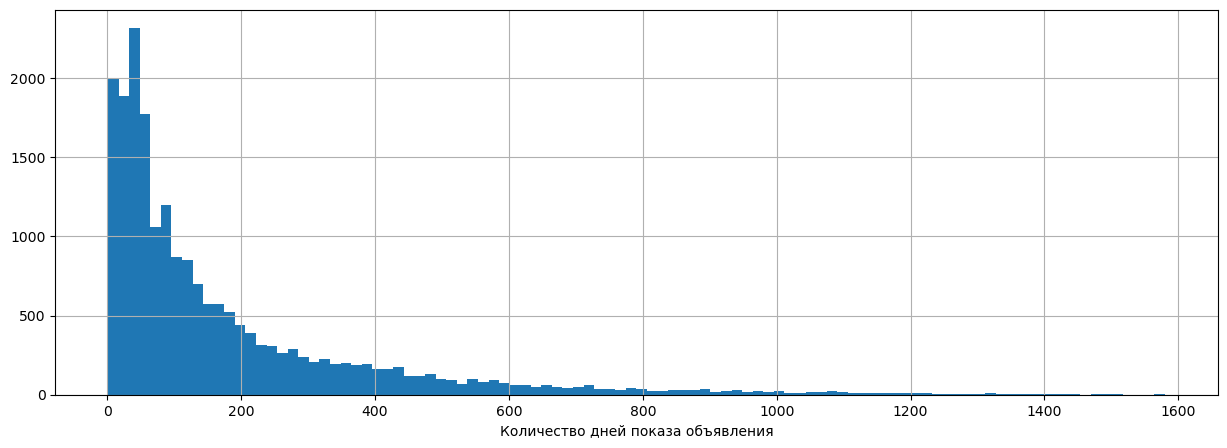

Среднее: 180.69314344442813
Медиана: 95.0
count    20433.000000
mean       180.693143
std        219.482467
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


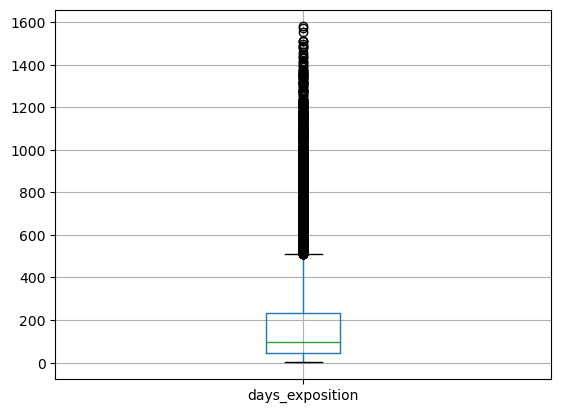

In [62]:
data['days_exposition'].hist(figsize=(15,5), bins=100)
plt.xlabel('Количество дней показа объявления')
plt.show()
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())
print(data['days_exposition'].describe())
data.boxplot('days_exposition')
plt.show()

Судя по гистограмме большинство квартир продается от 2 до 6 месяцев. Медиана равна 95 дням, что в 2 раза меньше среднего. Среднее сильно подвержено смещению вправо из-за долгих объявлений. Скорее всего это очень дорогие квартиры с большой площадью и нестандартной планировкой. Половина данных находится между 45 и 231 днями. Считаю разумным 3 квартиль принять как границу того когда квартира продается быстро, а когда медленно.

#### Факторы влияющие на цену объекта

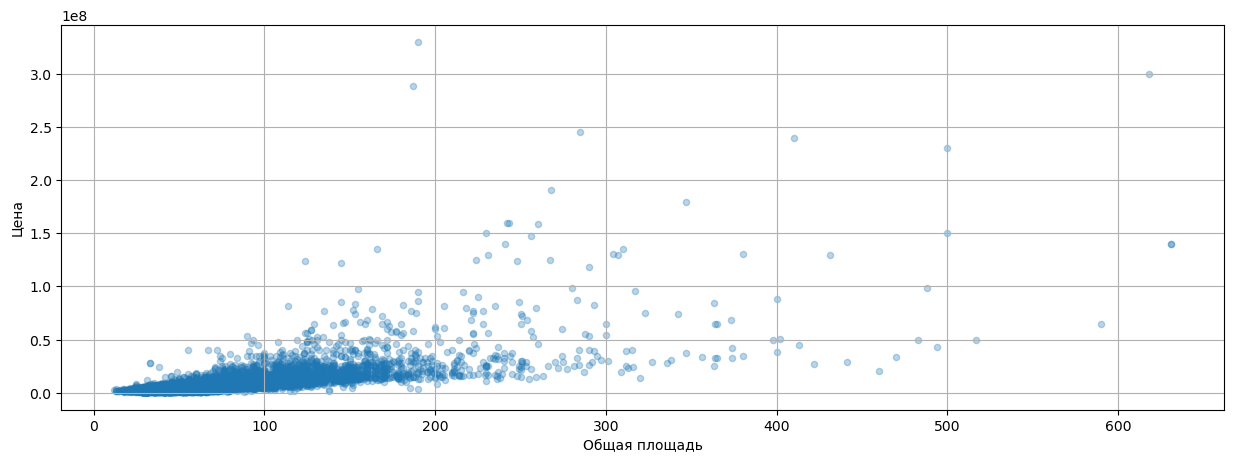

Корелляция цены от общей площади: 0.7


In [63]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(15,5), alpha=0.3)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()
print('Корелляция цены от общей площади:',  round(data['last_price'].corr(data['total_area']), 2))

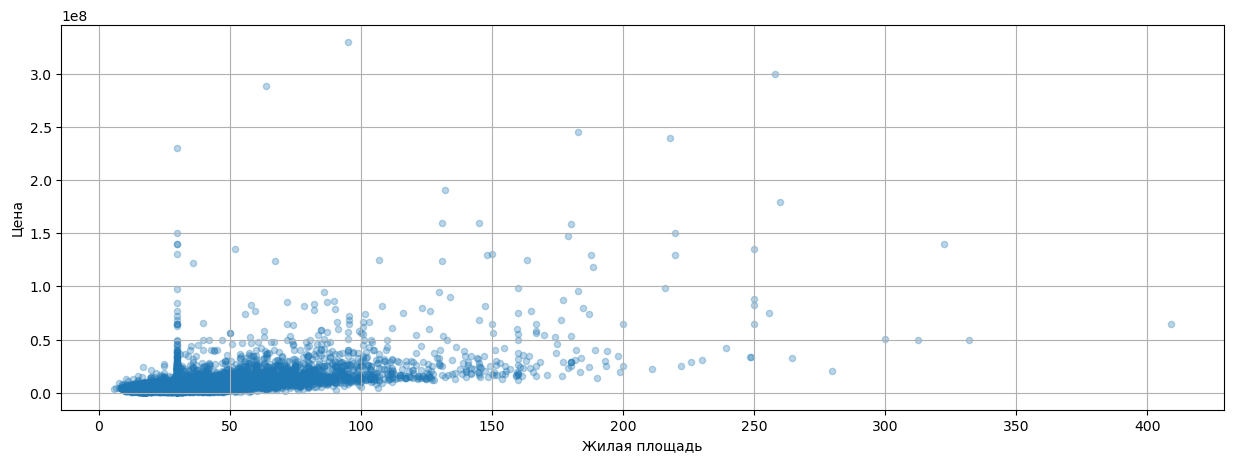

Корелляция цены от общей площади: 0.57


In [64]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(15,5), alpha=0.3)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()
print('Корелляция цены от общей площади:',  round(data['last_price'].corr(data['living_area']), 2))

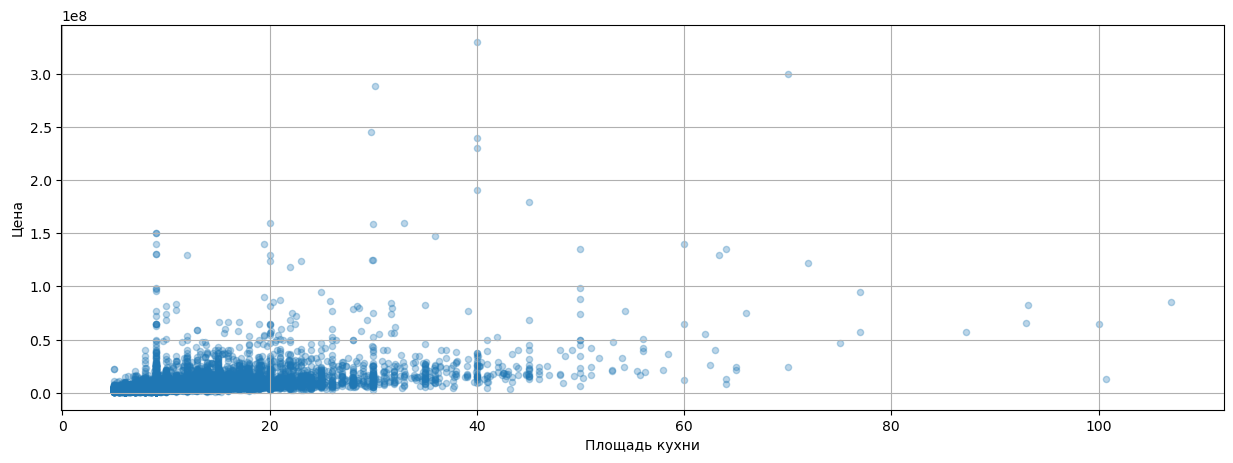

Корелляция цены от общей площади: 0.49


In [65]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(15,5), alpha=0.3)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()
print('Корелляция цены от общей площади:',  round(data['last_price'].corr(data['kitchen_area']), 2))

Цена сильнее всего зависит от общей площади, нежели от жилой площади и от площади кухни. Прямая зависимость, чем больше площадь, тем выше цена.

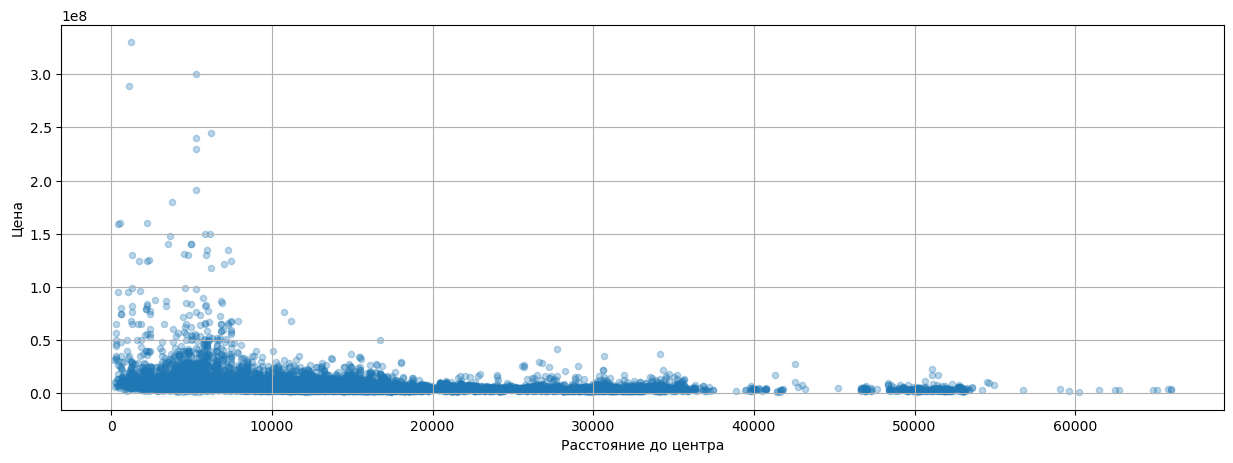

Корелляция цены от общей площади: -0.24


In [66]:
data.plot(x='city_centers_nearest', y='last_price', kind='scatter', grid=True, figsize=(15,5), alpha=0.3)
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.show()
print('Корелляция цены от общей площади:',  round(data['last_price'].corr(data['city_centers_nearest']), 2))

Коэффициент корреляции показывает, что чем дальше квартира от центра тем она дешевле.

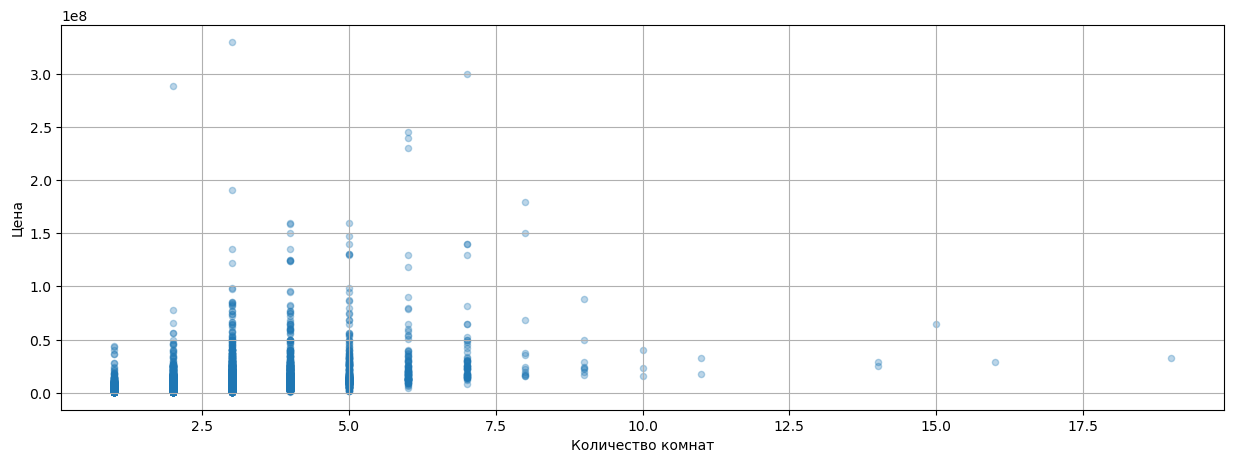

Корелляция цены от общей площади: 0.4


In [67]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(15,5), alpha=0.3)
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()
print('Корелляция цены от общей площади:',  round(data['last_price'].corr(data['rooms']), 2))

Комнаты - фактор не сильно влияющий не цену квартиры. Если позволяет площадь, то количество комнат можно увеличить посредством перегородок.

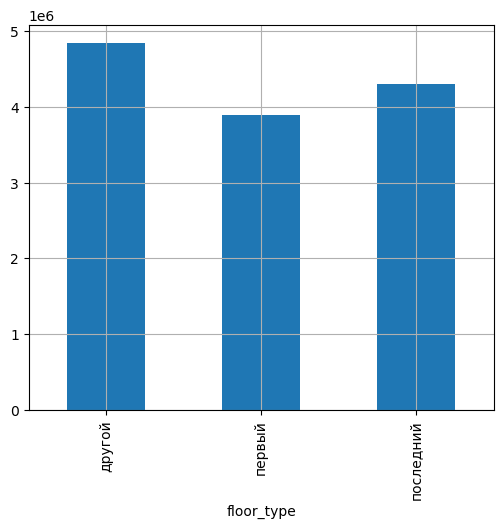

In [68]:
floor_type = data.groupby('floor_type')['last_price'].median()
floor_type.plot(x=floor_type.index, y=floor_type.values, kind='bar', grid=True, figsize=(6,5))
plt.show()

На диаграмме видно, что дороже продают квартиры не на первом и не на последнем этажах.

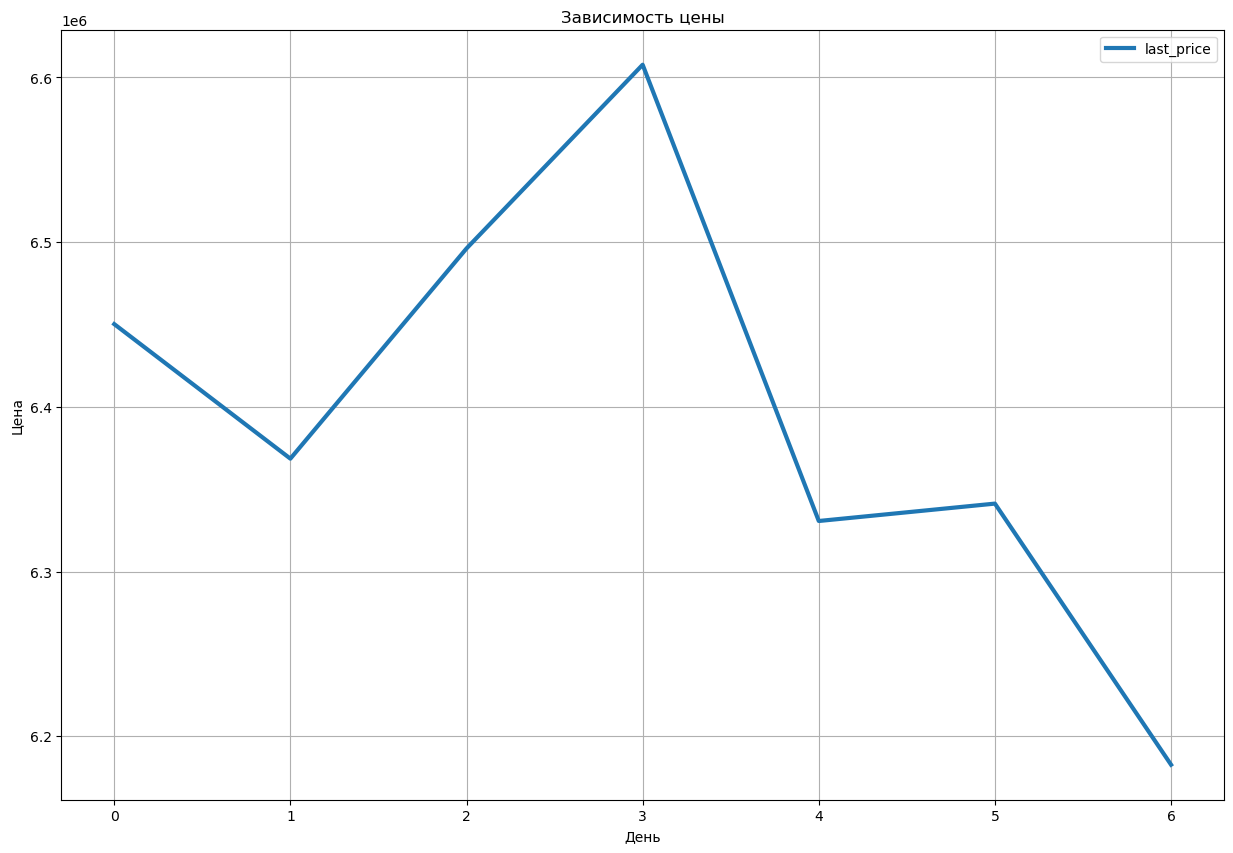

In [69]:
data.pivot_table(index='weekday', values=['last_price']).plot(grid=True, figsize=(15, 10),linewidth=3,title='Зависимость цены')
plt.xlabel('День')
plt.ylabel('Цена')
plt.show()

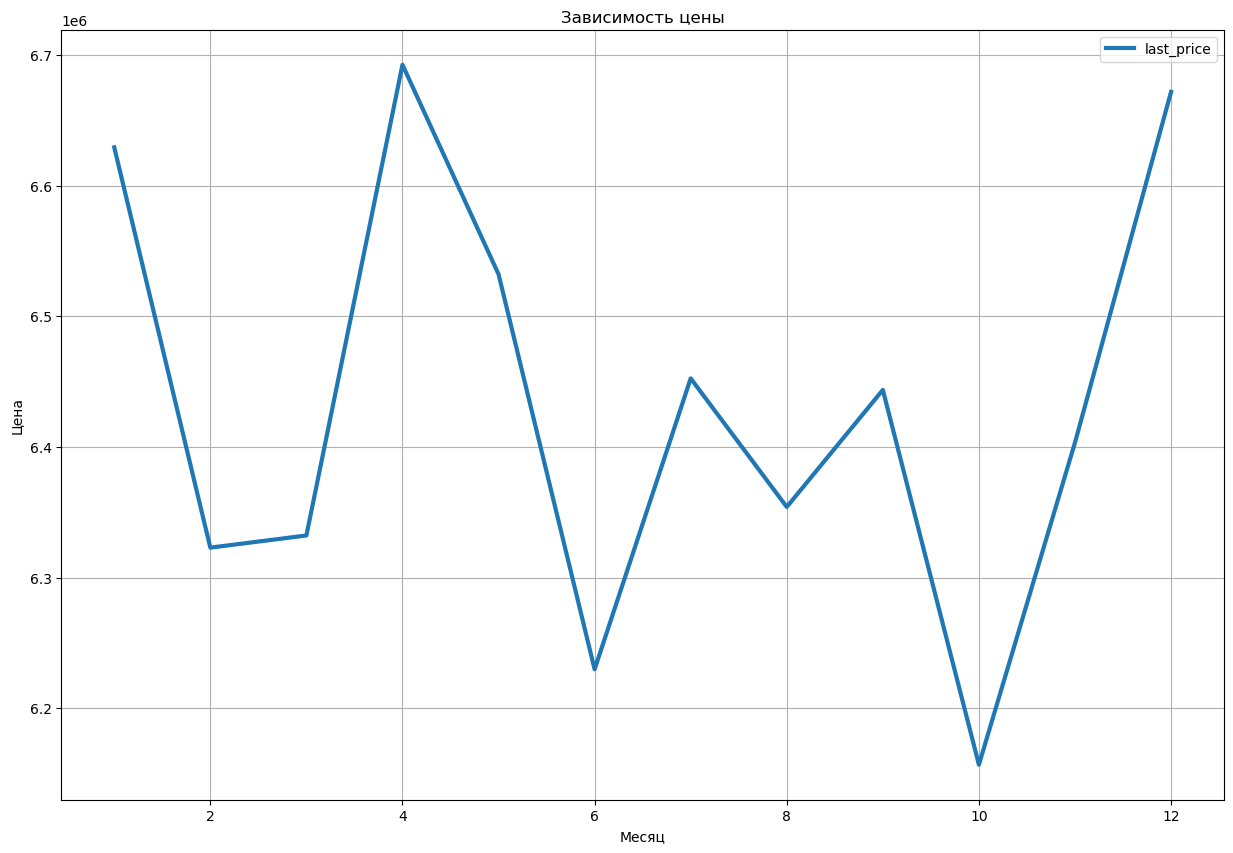

In [70]:
data.pivot_table(index='month', values=['last_price']).plot(grid=True, figsize=(15, 10),linewidth=3,title='Зависимость цены')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

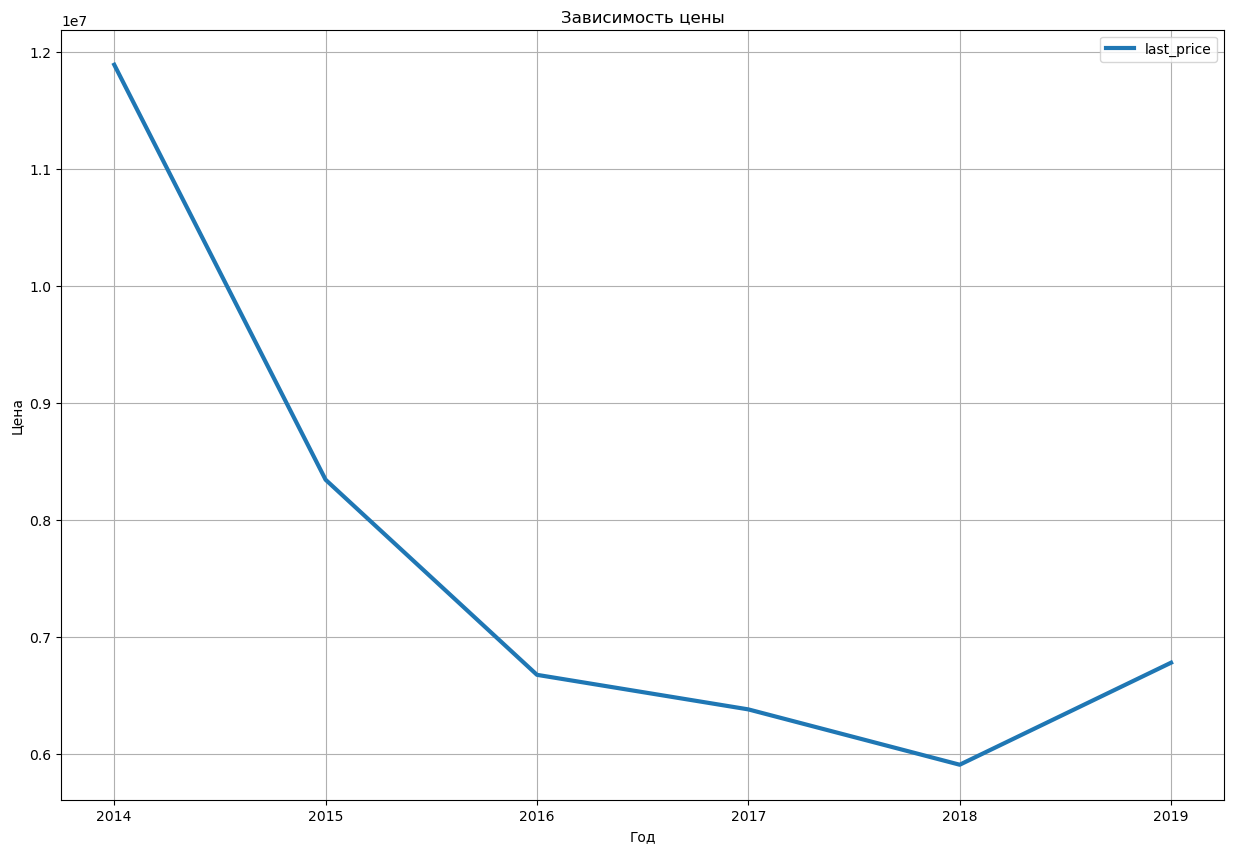

In [71]:
data.pivot_table(index='year', values=['last_price']).plot(grid=True, figsize=(15, 10),linewidth=3,title='Зависимость цены')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

In [72]:
data_1 = data.pivot_table(index='year', values=['last_price','total_area'], aggfunc='median')
data_1['price_per_metr'] = round(data_1['last_price'] / data_1['total_area'])
data_1

,last_price,total_area,price_per_metr
year,,,
2014,7580000,76,99737.0
2015,5300500,60,88342.0
2016,4530000,53,85472.0
2017,4500000,52,86538.0
2018,4550000,50,91000.0
2019,5050000,51,99020.0


Дороже всего квартиры выставлялись в четверг. По месяцам пики в декабре и апреле. По годам в цене виден спад, но что интересно, с уменьшением цены, уменьшались и продаваемые квадраты, так в 2014 и 2019 годах цена за кв. м равна 99 тыс. руб. В 2016 - 85 тыс. руб. за квадрат. Ощутимая разница в цене. Получается до 2016 года недвижимость дешевела, а после начала снова расти.

#### Средняя цена за квадратный метр

In [73]:
data_top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_top_10

,first_day_exposition
locality_name,
санкт-петербург,15647
поселок мурино,554
поселок шушары,439
всеволожск,396
пушкин,368
колпино,338
поселок парголово,325
гатчина,307
деревня кудрово,299


Очевидно, что больше всего квартир продается в Петербурге. В других населенных пунктах количество не сильно отличается.

In [74]:
data_top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean').astype('int')
data_top_10

,first_day_exposition,cost_per_meter_mean
locality_name,,
санкт-петербург,15647,114897
поселок мурино,554,86266
поселок шушары,439,79007
всеволожск,396,68999
пушкин,368,103542
колпино,338,75735
поселок парголово,325,90490
гатчина,307,69045
деревня кудрово,299,93001


Самая дорогая недвижимость в Петербурге - 115 т.руб/кв.м, на втором месте пушкин - 103 т.руб/кв.м. Дешевле всего в Выборге - 58 т.руб/кв.м

#### Средняя цена за километр

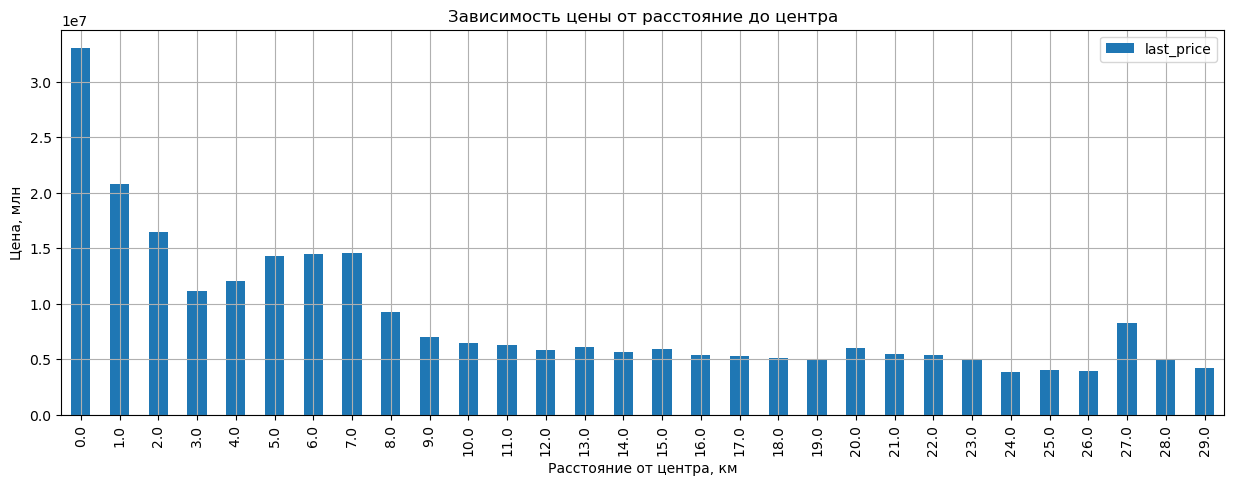

In [75]:
saint_petersburg = data[data['locality_name'] == 'санкт-петербург']
saint_petersburg.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(kind='bar', grid=True, figsize=(15,5))
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена, млн')
plt.title('Зависимость цены от расстояние до центра')
plt.show()

Дороже всего квартиры до 1 км от центра, далее цена уменьшается. С 3-го до 7-го км цена снова растет, потом убывает и почти не меняется.

#### Вывод  
В этом разделе выяснили:  
каких квартир больше представленно на рынке - приемущественно 1 и 2 комнатные;  
насколько быстро продаются квартиры - примерно за 2-6 мес.;  
какие факторы влияют на стоимость - в основном это общая площадь и расстояние до центра;  
среднюю цену за квадратный метр в регионах - самые дорогие в Петербурге и Пушкине;
цену за каждый км от центра - самые дорогие квартиры в центре Петербурга.

### Общий вывод

В начале работы были исправлены типы данных некоторых столбцов и стилистические ошибки в названиях столбцов, удалены выбросы, дубликаты. Добавлены дополнительные столбцы и проведен анализ.  
Больше всего продаются 1 и 2-х комнатные квартиры с площадью от 30 до 60 кв. м. Дальше следют 3-х комнатные квартиры с плошадью до 90 кв. м. В большинстве случаев квартиры расположены с 1 по 9 этаж, так как дома с такой этажностью самые распространенные. Квартиры с большим количеством комнат продаются реже и дольше по времени.  
Приемущественно квартиры продают от 3 до 7 млн. руб. Самые дорогие квартиры в центре Петербурга. По мере удаления от центра цена уменьшается. Хотя в некторых районах области цена за кв. м сопоставима с городом. Естественно, больше всего предложение в Петербурге. Недалеко расположен аэропорт, в городе много парков и прудов, актвно идет застройка новых районов. 